# **Exploratory Data Analysis (EDA): Olist Datasets**

This notebook performs EDA on the Olist e-commerce datasets available in the processed-data folder.

#### **Import necessary libraries**

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.gridspec import GridSpec
import math
import requests
import folium
from folium.plugins import FastMarkerCluster
import matplotlib.colors as mcolors 
from wordcloud import WordCloud, STOPWORDS


#### **Paths to datasets**

In [2]:
# Define the base path for the processed datasets
base_path = os.path.dirname(os.getcwd())  
processed_data_path = os.path.join(base_path, 'processed-data')

#### **Load Datasets**

In [3]:
# Define the dataset names and corresponding paths
dataset_paths = {
    'customers': os.path.join(processed_data_path, 'customers.parquet'),
    'geolocation': os.path.join(processed_data_path, 'geolocation.parquet'),
    'orders': os.path.join(processed_data_path, 'orders.parquet'),
    'order_items': os.path.join(processed_data_path, 'order_items.parquet'),
    'order_payments': os.path.join(processed_data_path, 'order_payments.parquet'),
    'order_reviews': os.path.join(processed_data_path, 'order_reviews.parquet'),
    'products': os.path.join(processed_data_path, 'products.parquet'),
    'category_translation': os.path.join(processed_data_path, 'product_category_name_translation.parquet'),
    'sellers': os.path.join(processed_data_path, 'sellers.parquet')
}

# Load Parquet files into Pandas DataFrames
datasets = {name: pd.read_parquet(path) for name, path in dataset_paths.items()}

# Display dataset names and their row/column counts
for name, df in datasets.items():
    print(f"Dataset: {name} - Rows: {len(df)}, Columns: {df.shape[1]}")

Dataset: customers - Rows: 99441, Columns: 5
Dataset: geolocation - Rows: 720154, Columns: 5
Dataset: orders - Rows: 99441, Columns: 8
Dataset: order_items - Rows: 112650, Columns: 7
Dataset: order_payments - Rows: 103886, Columns: 5
Dataset: order_reviews - Rows: 98408, Columns: 7
Dataset: products - Rows: 32951, Columns: 9
Dataset: category_translation - Rows: 71, Columns: 2
Dataset: sellers - Rows: 3095, Columns: 4


In [4]:
# Perform LEFT JOIN sequentially using Pandas
df = (
    datasets['orders']
    .merge(datasets['order_items'], on='order_id', how='left')                     # Left join with order items
    .merge(datasets['order_payments'], on='order_id', how='left')                  # Left join with payments
    .merge(datasets['order_reviews'], on='order_id', how='left')                   # Left join with reviews
    .merge(datasets['products'], on='product_id', how='left')                      # Left join with products
    .merge(datasets['category_translation'], on='product_category_name', how='left')# Left join with category translation
    .merge(datasets['customers'], on='customer_id', how='left')                    # Left join with customers
    .merge(datasets['sellers'], on='seller_id', how='left')                        # Left join with sellers
)

#### **Summary Information**

Display basic information for each dataset, including null values and data types.

In [5]:
# Create a list to store dataset information
data_info = []

# Iterate through datasets and collect information
for name, df in datasets.items():
    # Count rows and columns
    row_count = len(df)
    column_count = df.shape[1]
    
    # Count total null values across all columns
    null_values = df.isnull().sum().sum()
    
    # Append dataset information to the list
    data_info.append({
        'Dataset': name,
        'Rows': row_count,
        'Columns': column_count,
        'Null Values': null_values
    })

# Convert the information into a Pandas DataFrame for better visualization
data_info_df = pd.DataFrame(data_info)

# Show the resulting DataFrame
print(data_info_df)

                Dataset    Rows  Columns  Null Values
0             customers   99441        5            0
1           geolocation  720154        5            0
2                orders   99441        8         4908
3           order_items  112650        7            0
4        order_payments  103886        5            0
5         order_reviews   98408        7       144631
6              products   32951        9         1838
7  category_translation      71        2            0
8               sellers    3095        4            0


#### **Null Value Analysis**

Analyze the columns with missing values in each dataset.

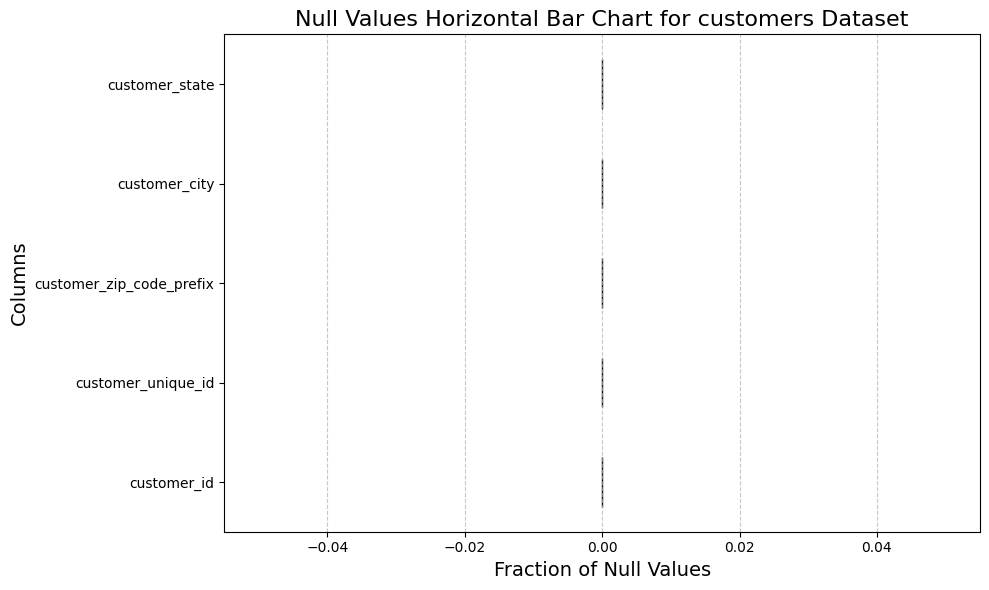

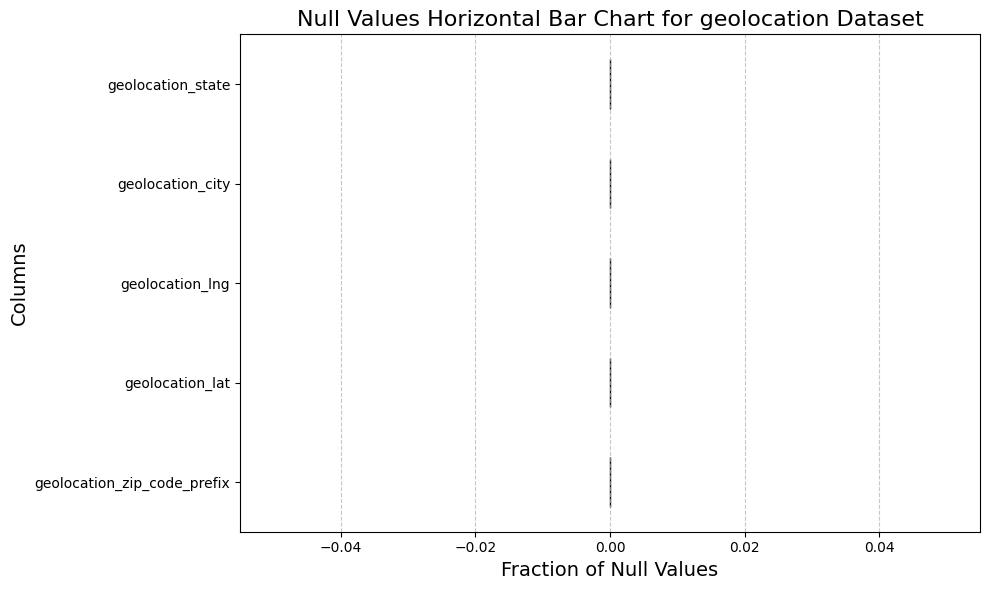

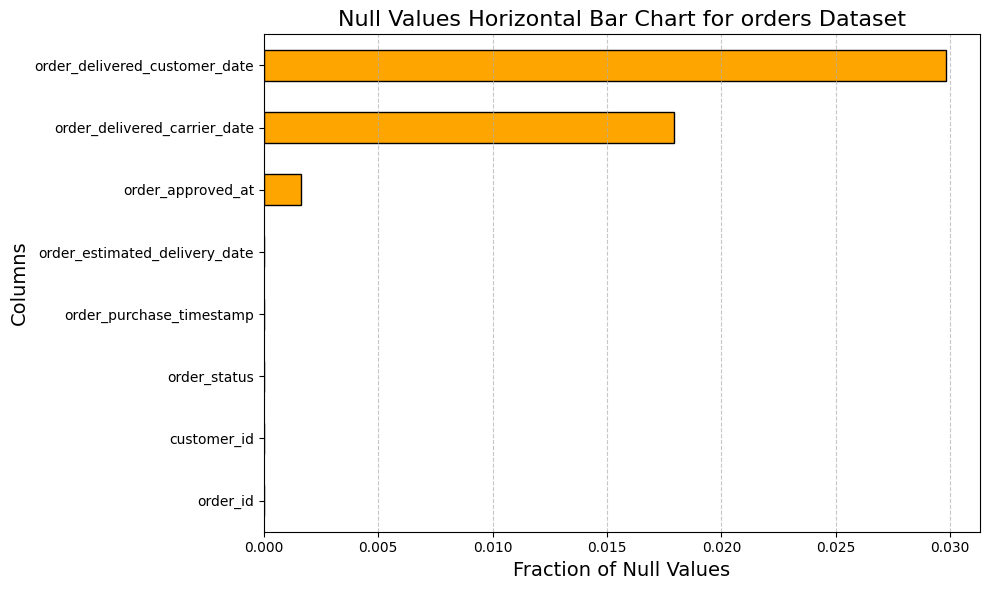

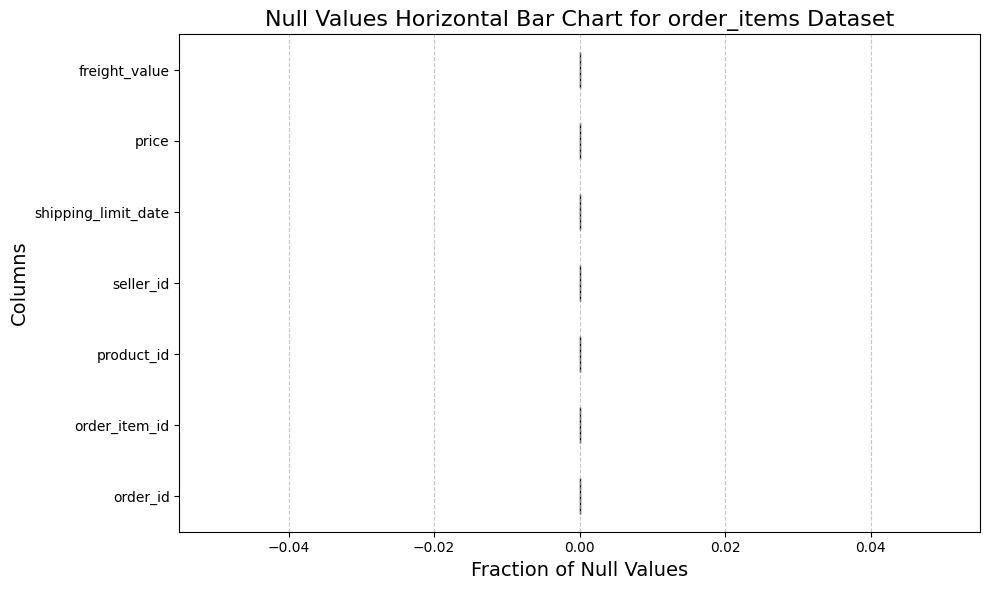

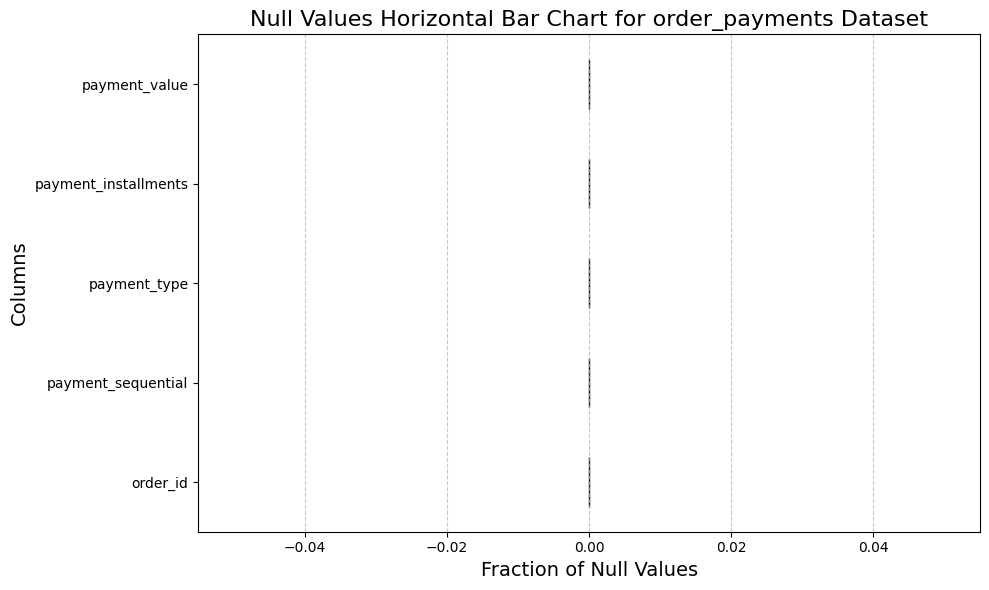

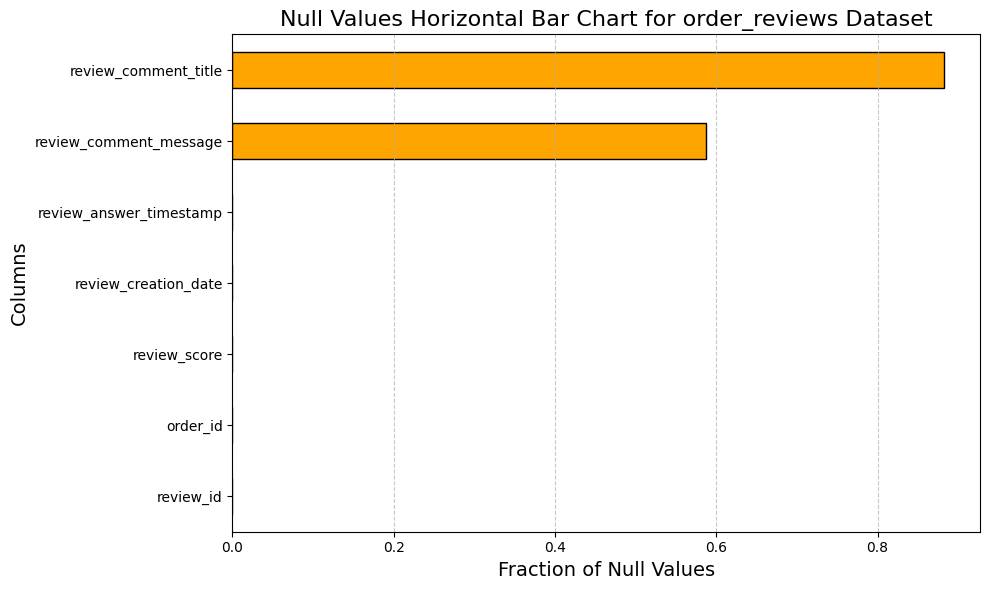

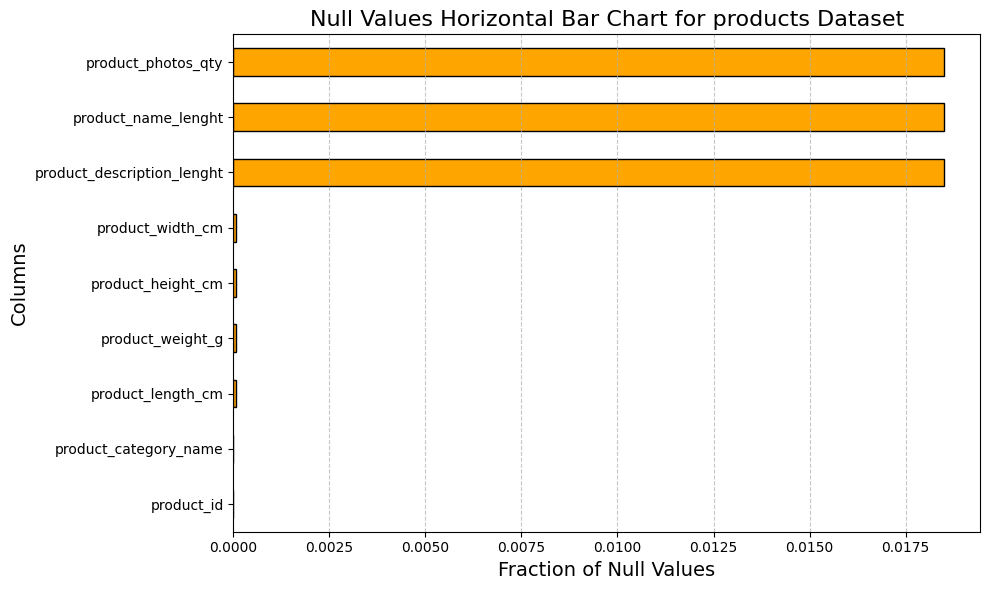

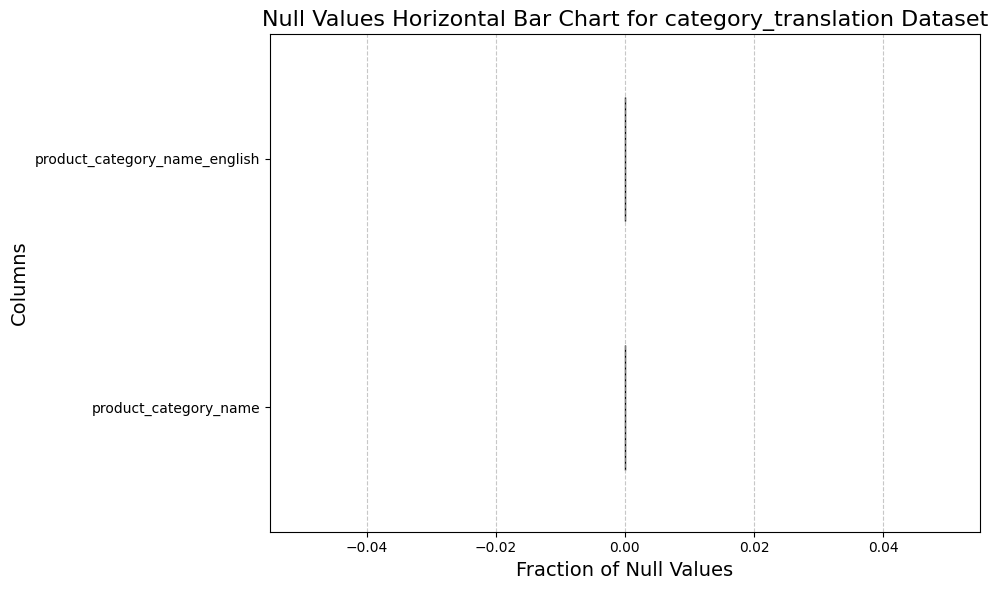

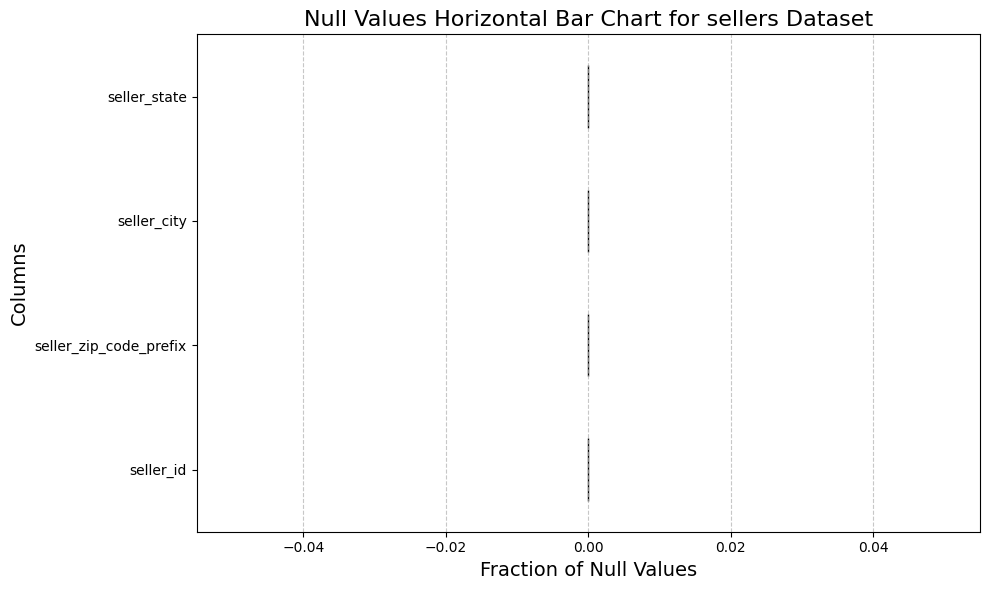

In [6]:
for name, df in datasets.items():
    # Calculate the fraction of null values for each column
    null_fractions = df.isnull().mean()

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    null_fractions.sort_values().plot(kind='barh', color='orange', edgecolor='black')
    plt.title(f'Null Values Horizontal Bar Chart for {name} Dataset', fontsize=16)
    plt.xlabel('Fraction of Null Values', fontsize=14)
    plt.ylabel('Columns', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### **Descriptive Statistics**

Generate descriptive statistics for numeric columns in each dataset.

In [39]:
# Exclude datasets that don't need descriptive statistics
excluded_datasets = ['customers', 'geolocation', 'sellers']

# Generate descriptive statistics for remaining datasets
for name, df in datasets.items():
    if name in excluded_datasets:
        continue  # Skip excluded datasets

    print(f"Descriptive Statistics for {name} Dataset:\n")
    
    # Filter only numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    numerical_cols = [col for col in numerical_cols if col != 'order_item_id']  # Exclude 'order_item_id'
    
    if len(numerical_cols) > 0:
        # Compute descriptive statistics for numerical columns
        stats = df[numerical_cols].describe()
        print(stats)
    else:
        print("No numerical columns to compute statistics.")
    
    print("\n")


Descriptive Statistics for orders Dataset:

No numerical columns to compute statistics.


Descriptive Statistics for order_items Dataset:

               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


Descriptive Statistics for order_payments Dataset:

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.0

#### **Data Distribution Analysis**

Visualize the distribution of key columns using histograms and boxplots.

Generating plots for orders Dataset...

No numeric columns found in the orders dataset.

Generating plots for order_items Dataset...



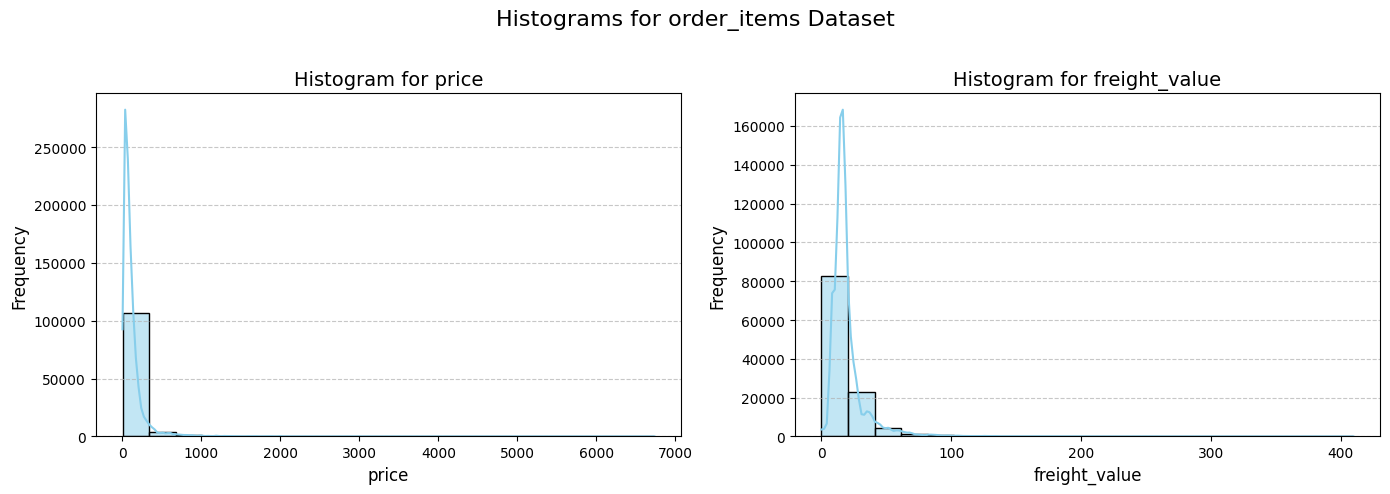

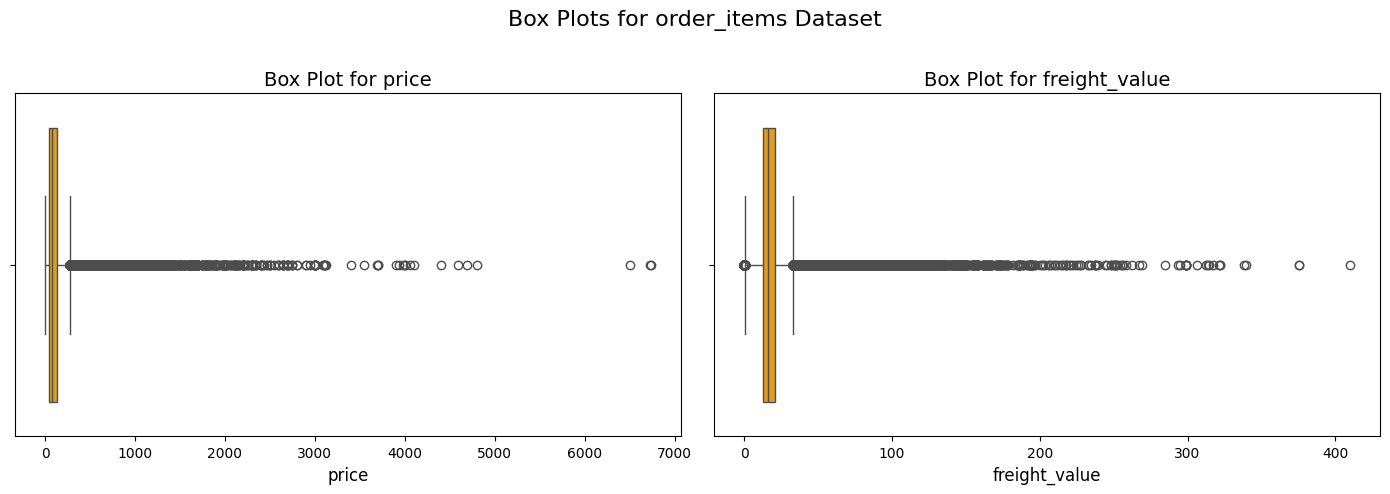

Generating plots for order_payments Dataset...



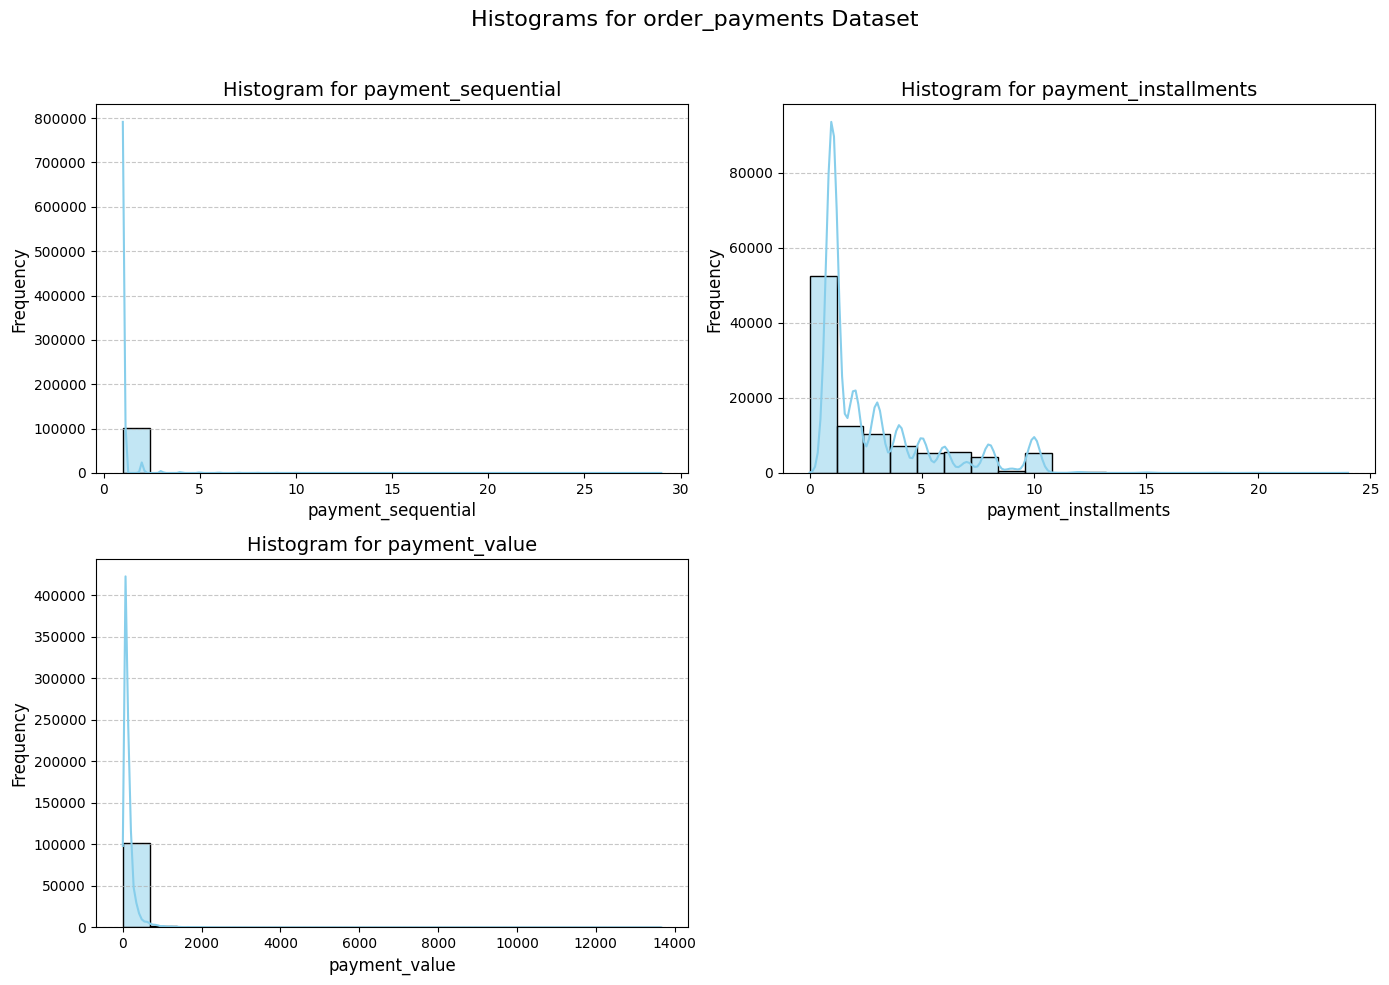

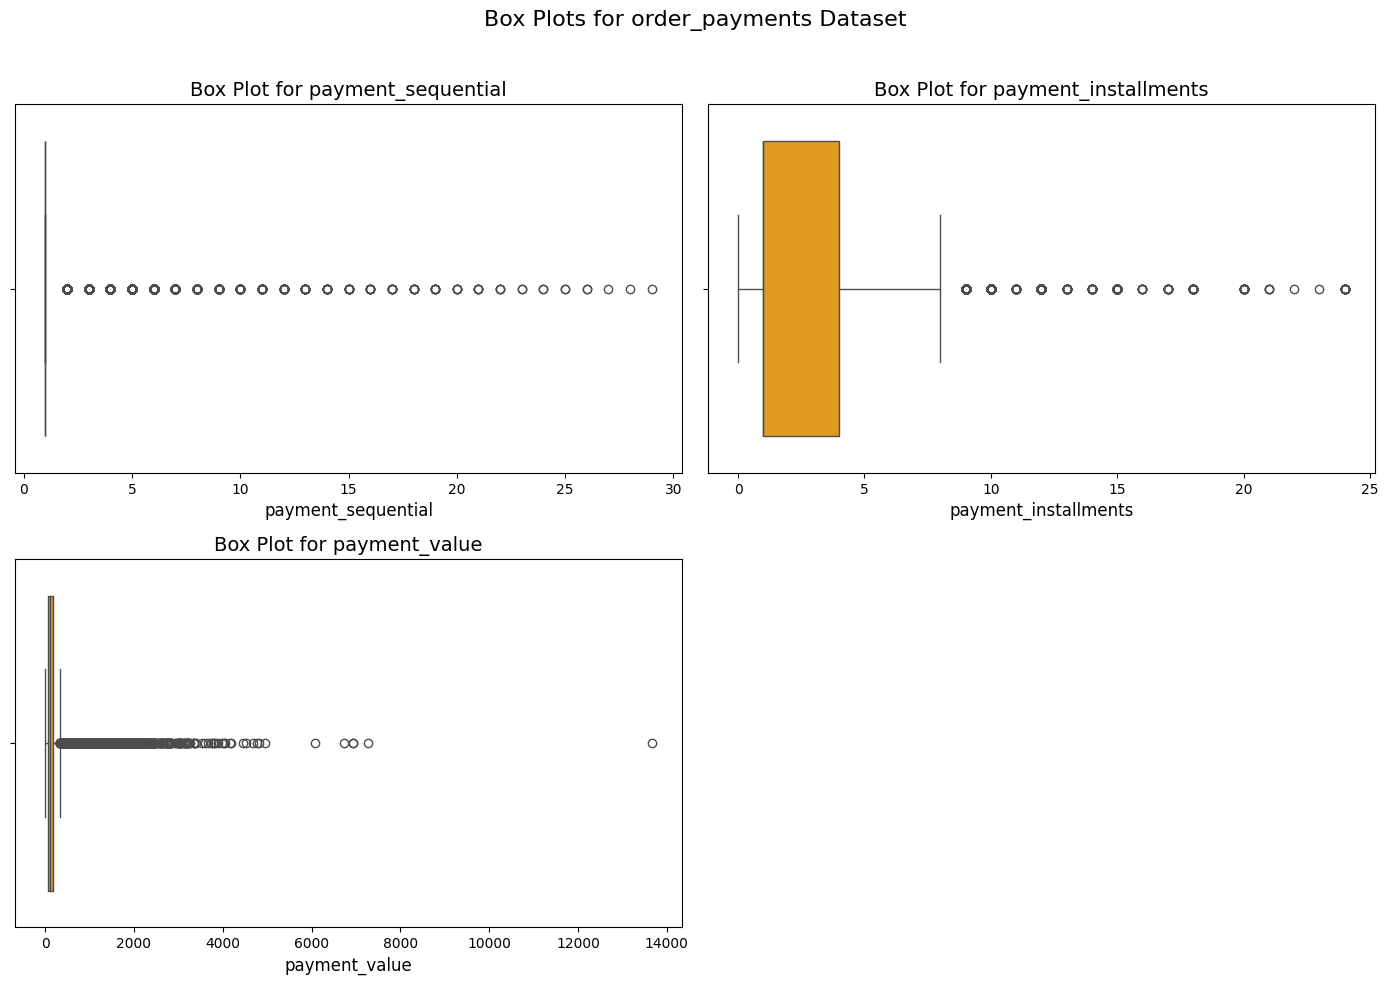

Generating plots for order_reviews Dataset...



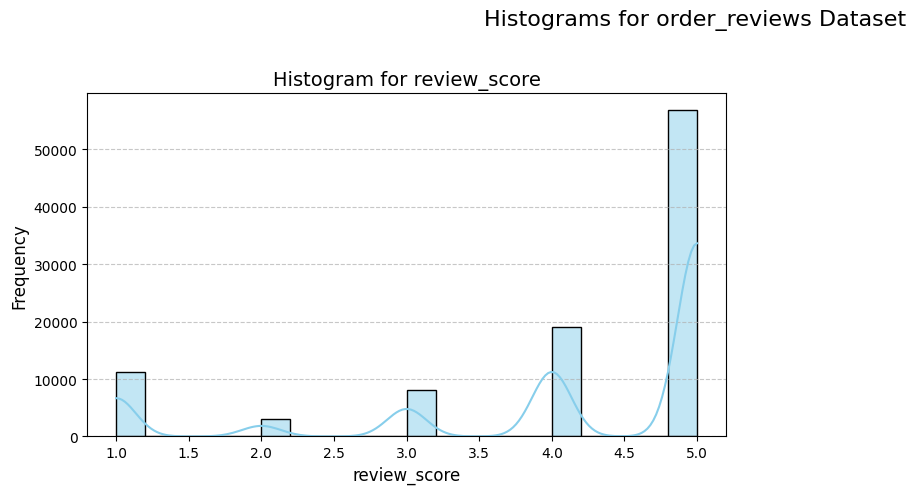

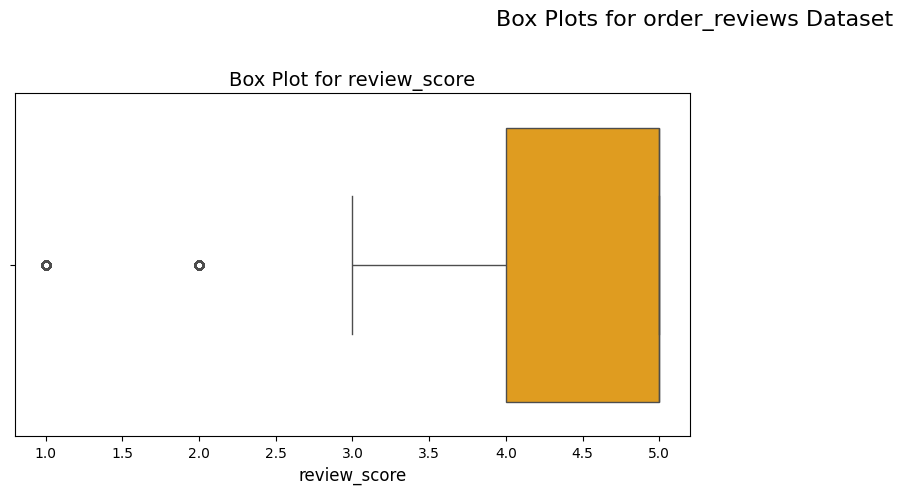

Generating plots for products Dataset...



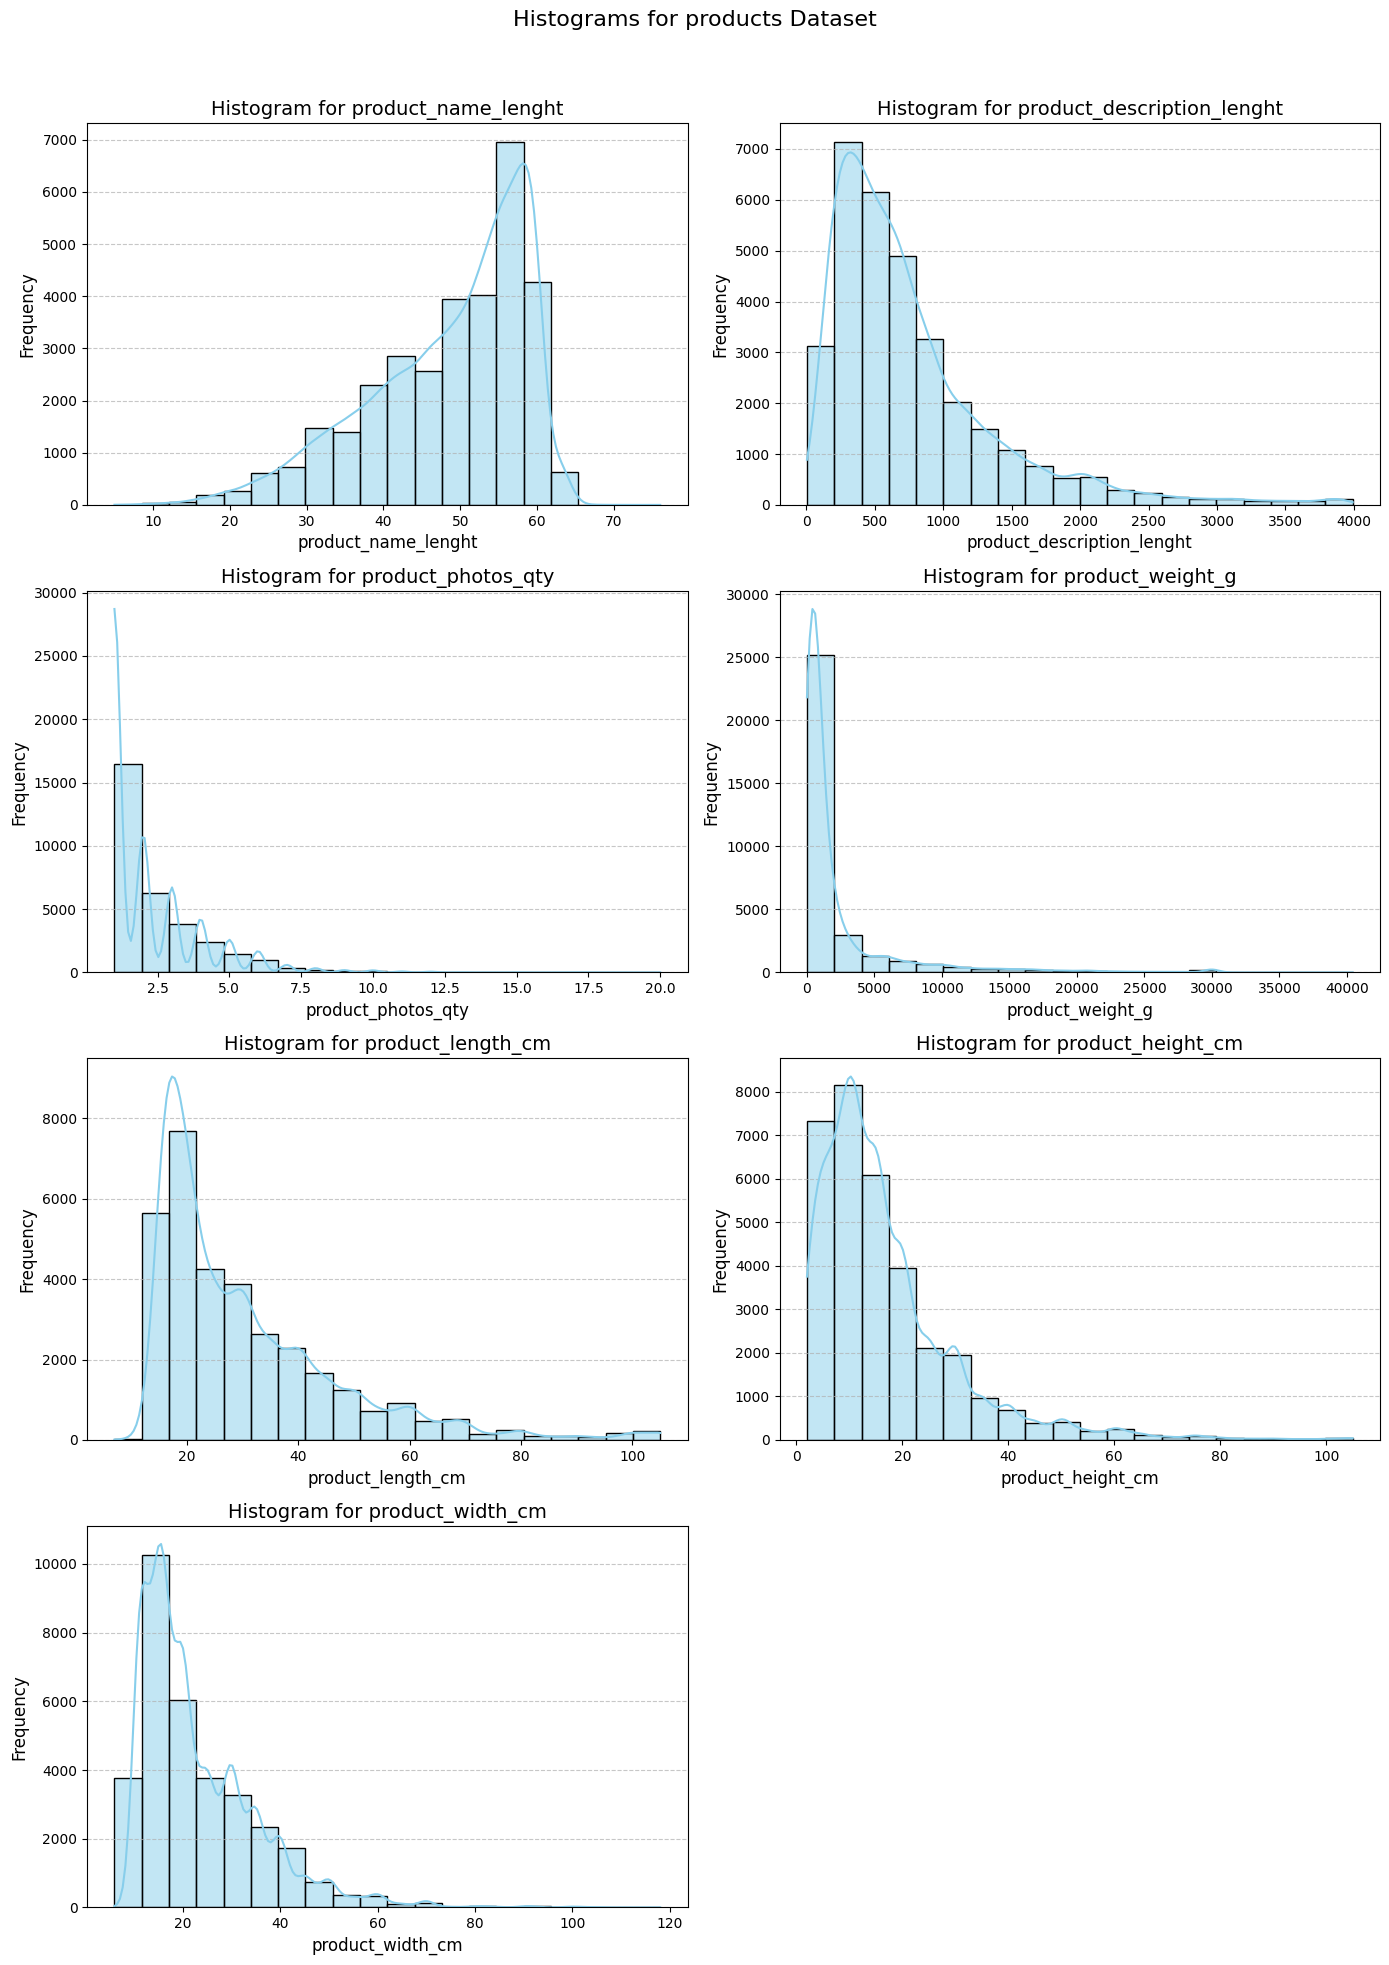

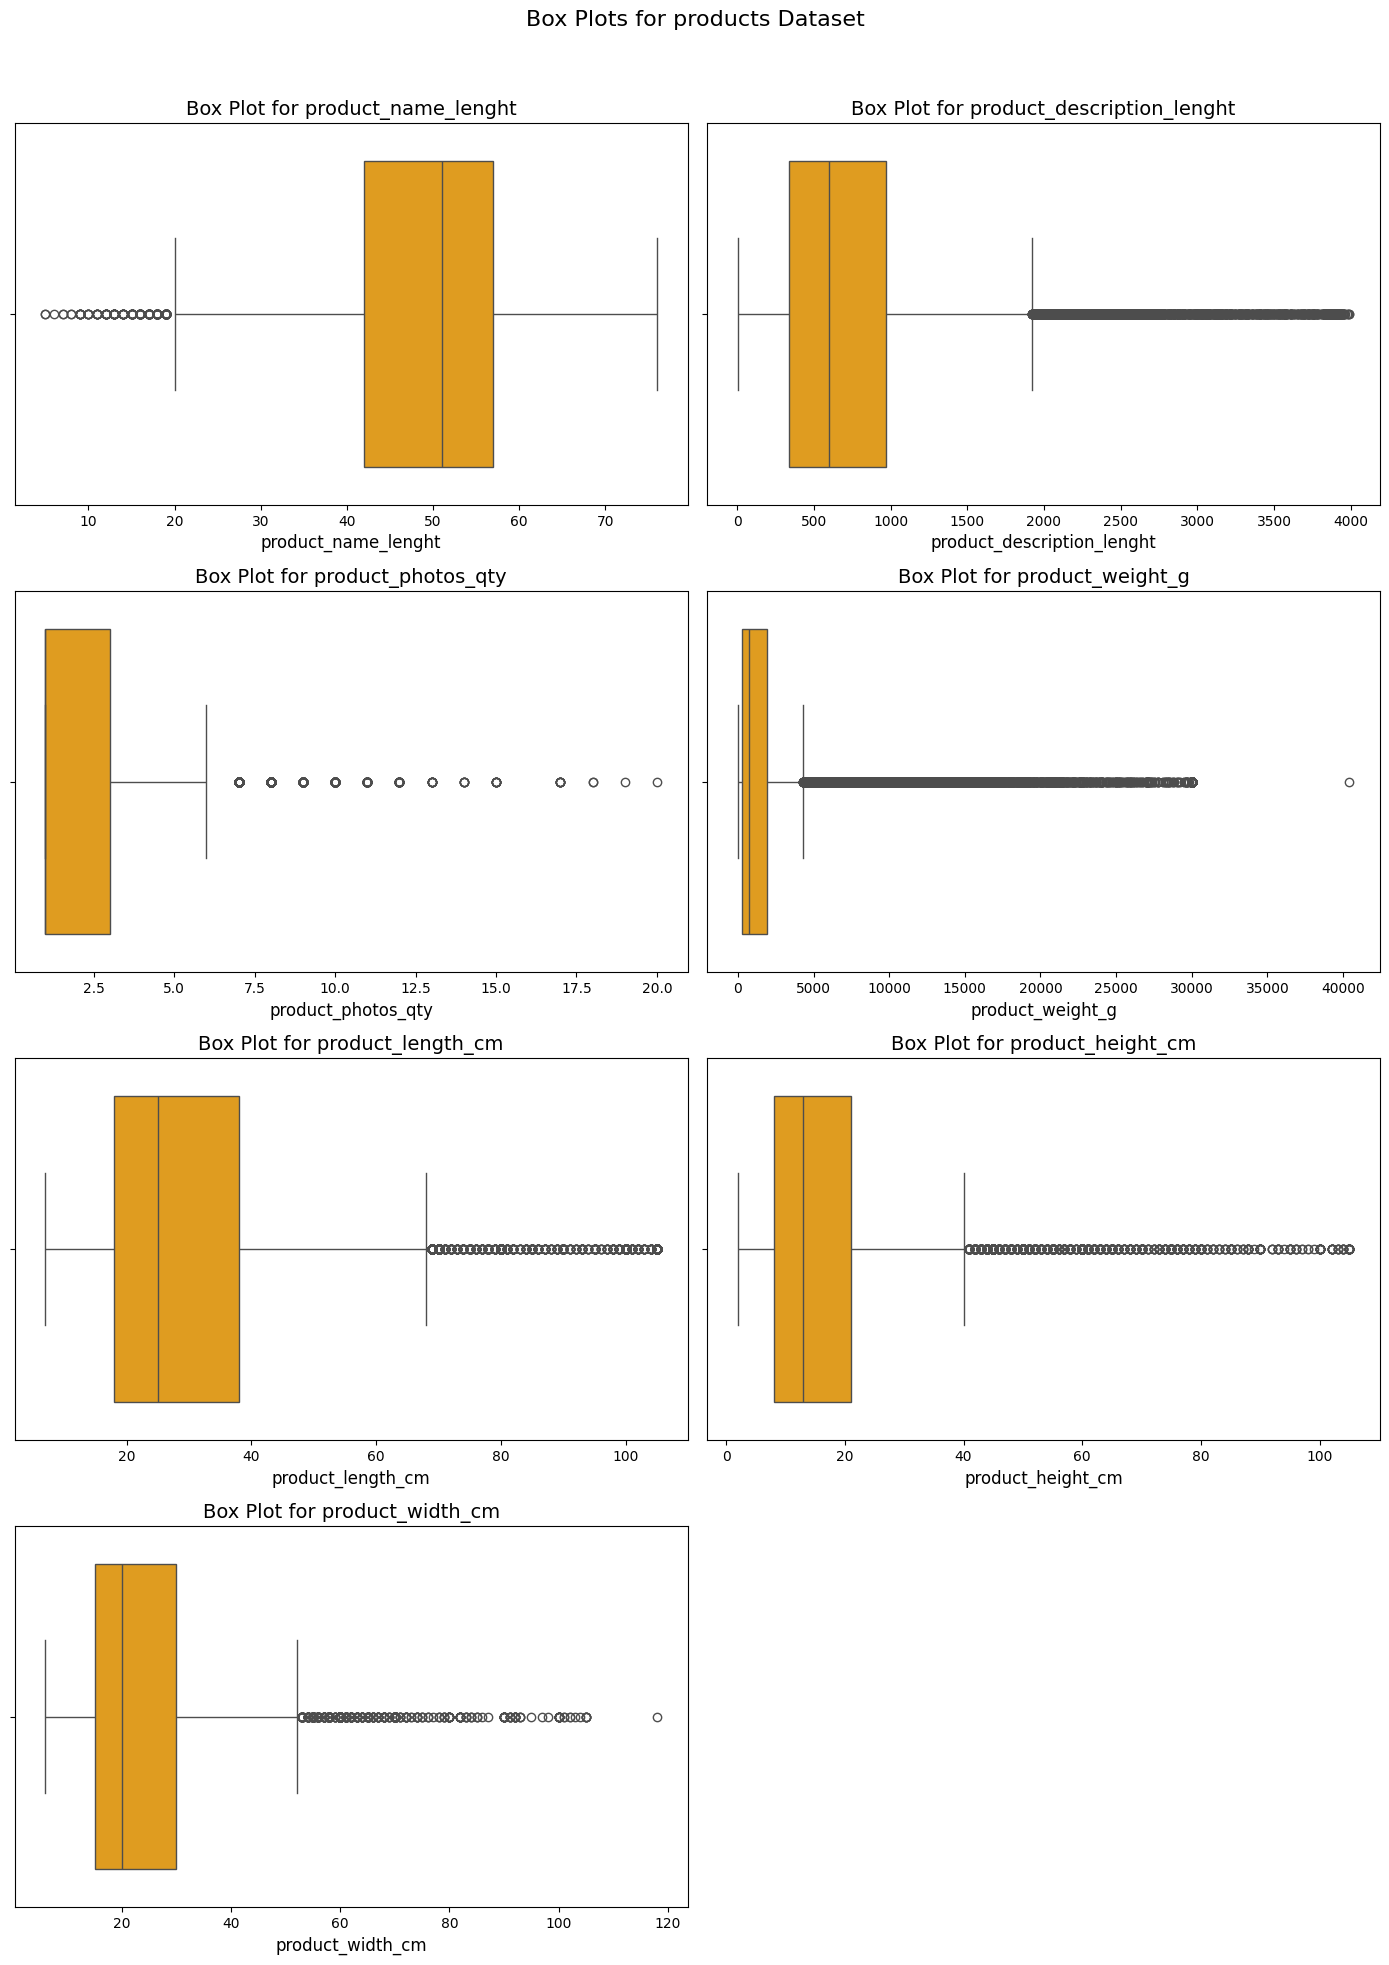

Generating plots for category_translation Dataset...

No numeric columns found in the category_translation dataset.



In [ ]:
# Exclude datasets that don't need plots
excluded_datasets = ['customers', 'geolocation', 'sellers']

# Generate histograms and box plots for remaining datasets
for name, df in datasets.items():
    if name in excluded_datasets:
        continue  # Skip excluded datasets

    print(f"Generating plots for {name} Dataset...\n")
    
    # Filter only numerical columns and exclude 'order_item_id'
    numerical_cols = df.select_dtypes(include=['number']).columns
    numerical_cols = [col for col in numerical_cols if col != 'order_item_id']  # Exclude 'order_item_id'
    
    if len(numerical_cols) > 0:
        # Plot histograms for numeric columns
        num_cols = len(numerical_cols)
        rows = math.ceil(num_cols / 2)  # Determine the number of rows needed
        fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 5))  # 2 columns per row
        axes = axes.flatten()  # Flatten axes for easier indexing
        
        for i, col in enumerate(numerical_cols):
            sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
            axes[i].set_title(f'Histogram for {col}', fontsize=14)
            axes[i].set_xlabel(col, fontsize=12)
            axes[i].set_ylabel('Frequency', fontsize=12)
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle(f'Histograms for {name} Dataset', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        
        # Plot box plots for numeric columns
        fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 5))  # 2 columns per row
        axes = axes.flatten()
        
        for i, col in enumerate(numerical_cols):
            sns.boxplot(x=df[col], color='orange', ax=axes[i])
            axes[i].set_title(f'Box Plot for {col}', fontsize=14)
            axes[i].set_xlabel(col, fontsize=12)
        
        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle(f'Box Plots for {name} Dataset', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    else:
        print(f"No numeric columns found in the {name} dataset.\n")


**Orders Items Dataset**

- **Histogram for price:** Most products are priced below 200, with a steep drop for higher prices. Outliers exist up to 7000.
- **Histogram for freight_value:** Freight values are concentrated below 50, with few instances above 100.
- **Box Plot for price:** Indicates a large number of outliers for higher prices.
- **Box Plot for freight_value:** Shows outliers for freight values above 100.


**Order Payments Dataset**

- **Histogram for payment_sequential:** Majority of payments are sequentially indexed as 1, with very few extending to 30.
- **Histogram for payment_installments:** Most transactions are 1-3 installments, with fewer going up to 24.
- **Histogram for payment_value:** Most payments are below 200, but there are significant outliers up to 14000.
- **Box Plot for payment_sequential:** Highlights the sequential nature of transactions, with no variability.
- **Box Plot for payment_installments:** Indicates moderate outliers for higher installment numbers.
- **Box Plot for payment_value:** Significant outliers for high payment values.

**Order Reviews Dataset**

- **Histogram for review_score:** Ratings cluster around 5, showing a tendency for high scores. Few ratings are below 3.
- **Box Plot for review_score:** Shows consistency with very few low outliers.

**Products Dataset**

- **Histogram for product_name_length:** Most product names have a length between 40 and 60.
- **Histogram for product_description_length:** Product descriptions generally fall between 400 and 1000 characters, with some outliers reaching 3500.
- **Histogram for product_photos_qty:** Most products have 1-2 photos, with a sharp decline after 5.
- **Histogram for product_weight_g:** Most products weigh below 5000 grams, but there are some extreme outliers up to 30000.
- **Histogram for product_length_cm:** The length of most products is between 20 and 40 cm, with a significant decline after 50 cm.
- **Histogram for product_height_cm:** Product heights are mostly clustered between 10 and 30 cm, with very few exceeding 40 cm.
- **Histogram for product_width_cm:** Most products have widths between 15 and 25 cm, with a steep decline beyond 40 cm. A few extreme cases reach up to 120 cm.
- **Box Plot for product_name_length:** The interquartile range (IQR) indicates that most product names have lengths between 40 and 60 characters. The median length is around 50 characters. There are some outliers with shorter or longer names, suggesting variability in product name lengths.
- **Box Plot for product_description_length:** The IQR shows that most product descriptions range from 400 to 1,000 characters, with a median around 700 characters. Notable outliers extend up to 3,500 characters, indicating that some product descriptions are exceptionally lengthy.
- **Box Plot for product_photos_qty:** Most products have between 1 and 3 photos, with the median around 2 photos. Outliers extend beyond 5 photos, with the maximum reaching 20.
- **Box Plot for product_weight_g:** The majority of product weights are under 5,000 grams, with a median of approximately 1,500 grams. Significant outliers exist, with some products weighing up to 40,000 grams, indicating a wide variation.
- **Box Plot for product_length_cm:** Most products have lengths between approximately 20 and 40 cm. The median is around 30 cm. Significant outliers are present beyond 60 cm, extending up to 100 cm. 
- **Box Plot for product_height_cm:** The height of most products lies between 10 and 25 cm. The median is close to 15 cm. Numerous outliers are observed beyond 30 cm, with some heights reaching 100 cm.
- **Box Plot for product_width_cm:** Product widths are predominantly between 10 and 30 cm. The median width is approximately 20 cm. There are substantial outliers extending beyond 60 cm, up to 120 cm.




#### **Correlation Analysis**

Analyze correlations between numeric columns in each dataset.

Generating correlation heatmap for numeric columns in the customers dataset...
Not enough numeric columns in the customers dataset to compute correlations.

Generating correlation heatmap for numeric columns in the geolocation dataset...


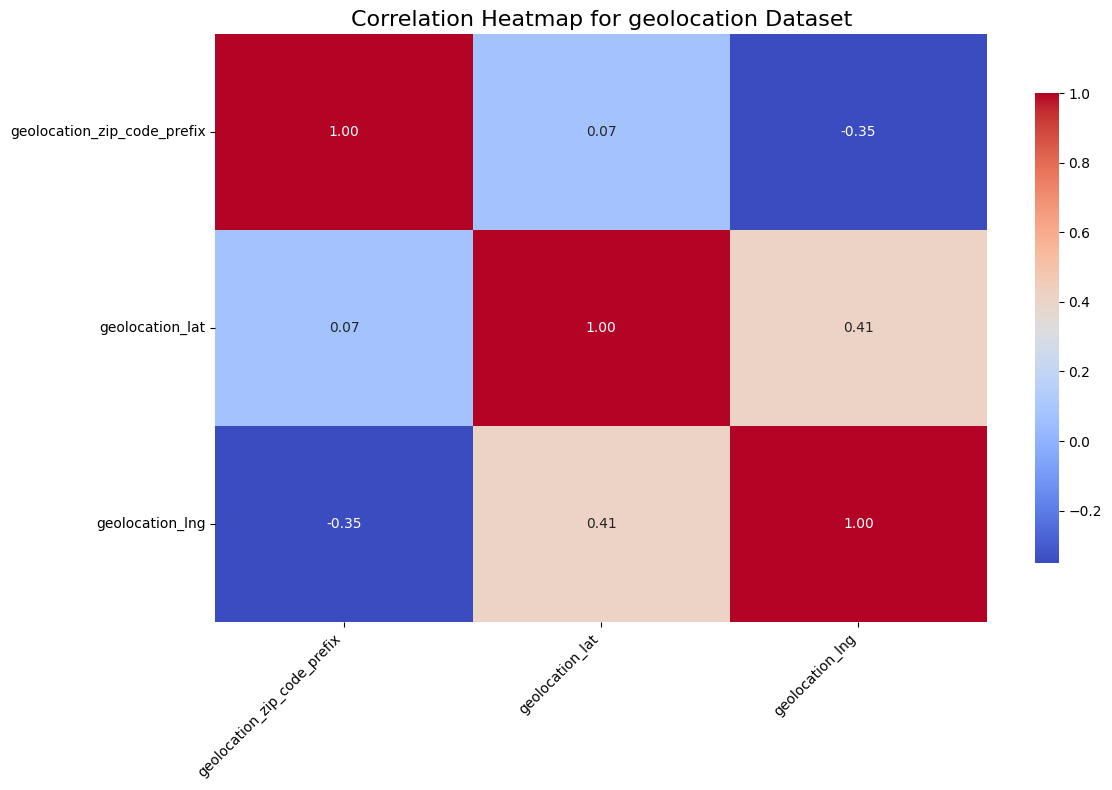

No numeric columns found in the orders dataset.

Generating correlation heatmap for numeric columns in the order_items dataset...


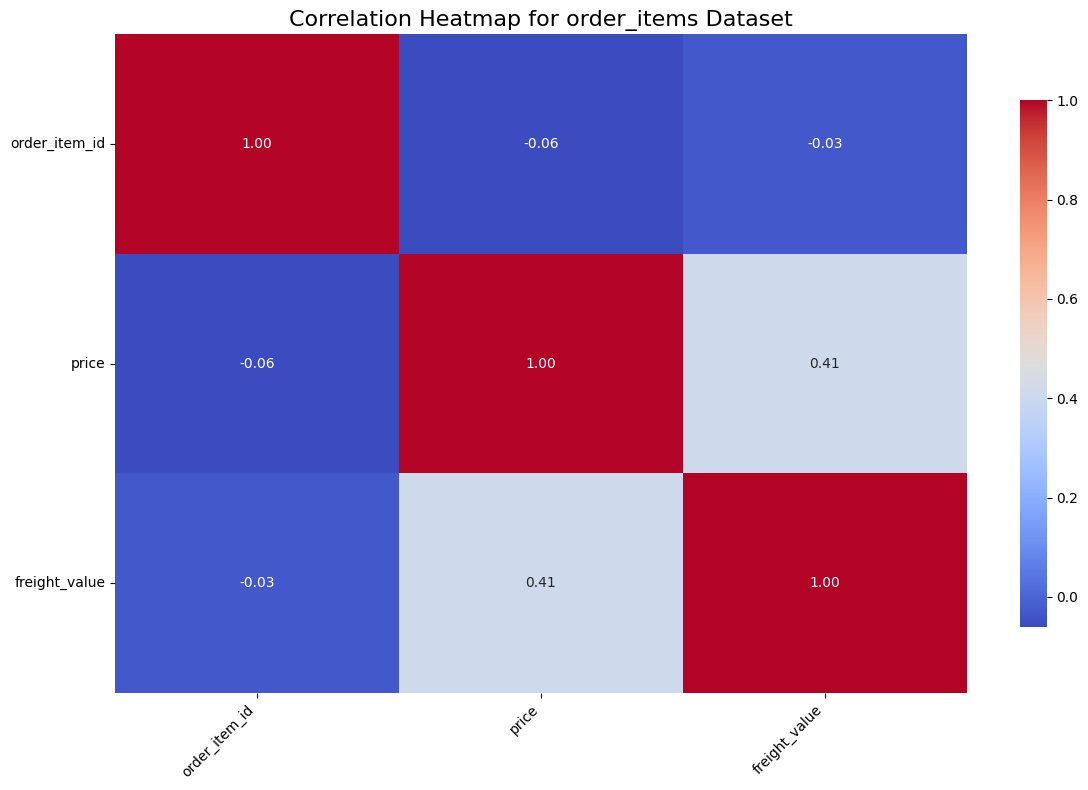

Generating correlation heatmap for numeric columns in the order_payments dataset...


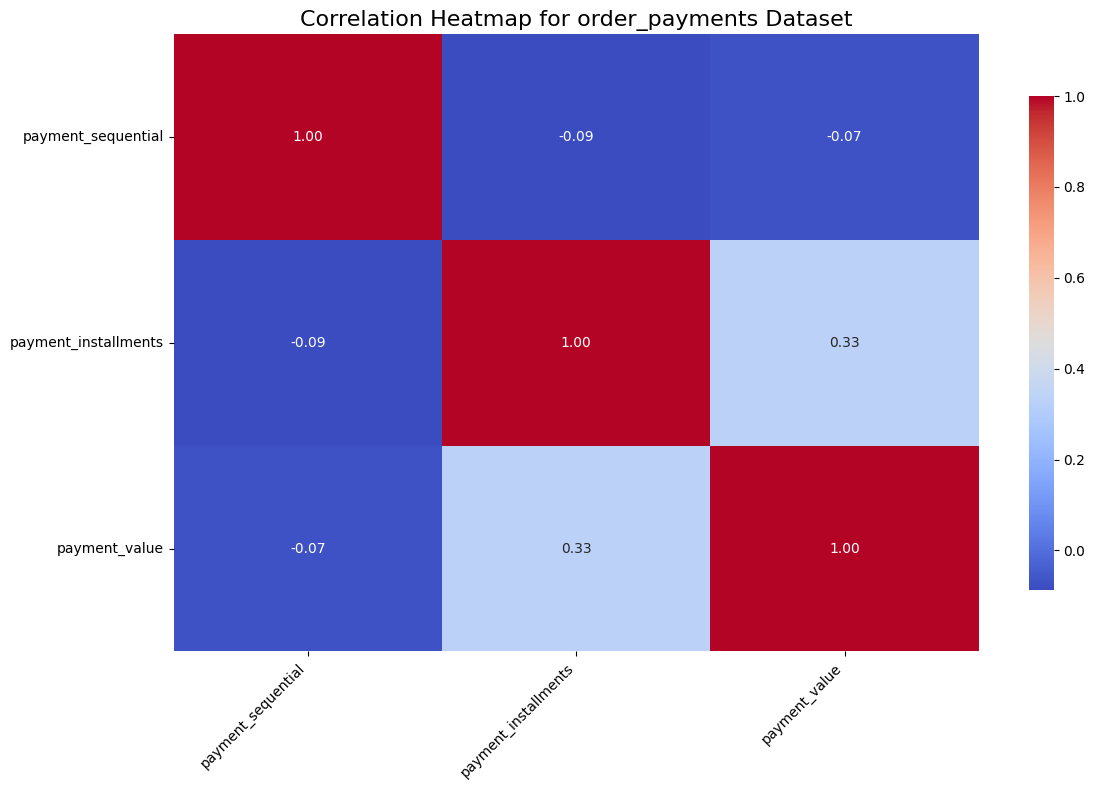

Generating correlation heatmap for numeric columns in the order_reviews dataset...
Not enough numeric columns in the order_reviews dataset to compute correlations.

Generating correlation heatmap for numeric columns in the products dataset...


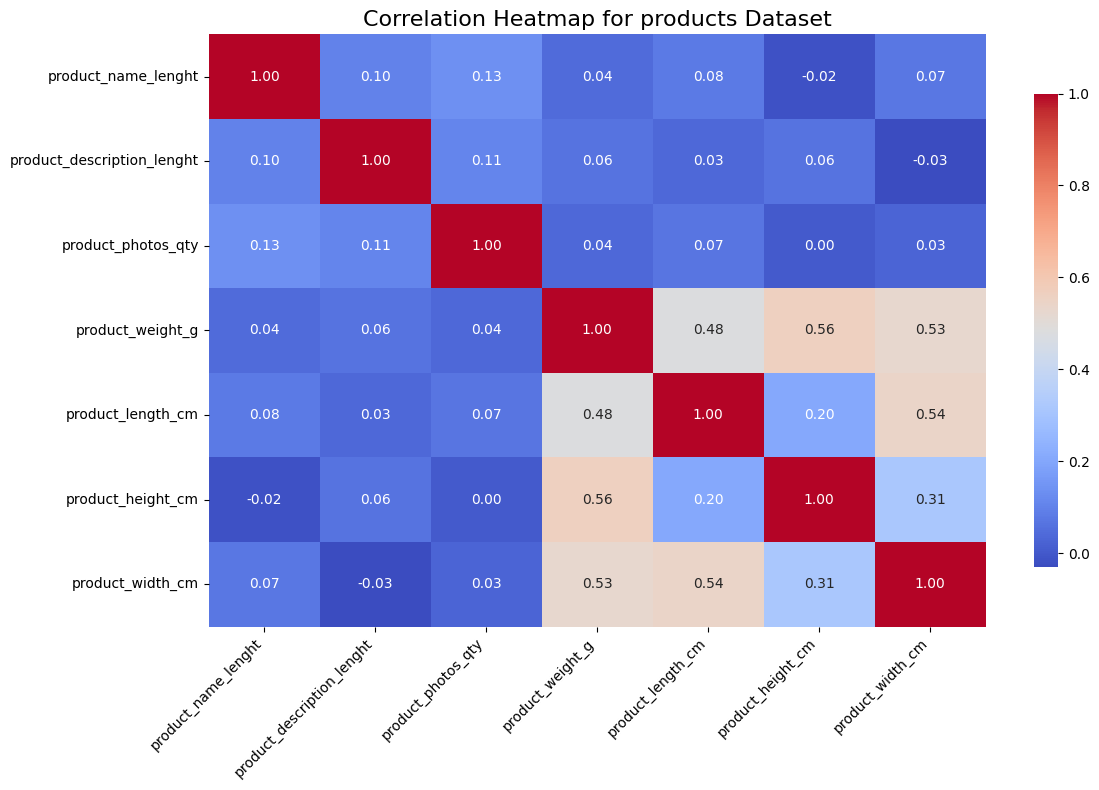

No numeric columns found in the category_translation dataset.

Generating correlation heatmap for numeric columns in the sellers dataset...
Not enough numeric columns in the sellers dataset to compute correlations.



In [16]:
# Iterate through all datasets
for name, df in datasets.items():

    numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
 
    if numeric_cols:
        print(f"Generating correlation heatmap for numeric columns in the {name} dataset...")

        # Convert to Pandas DataFrame if necessary
        if hasattr(df, 'toPandas'):  # PySpark DataFrame
            pandas_df = df.select(numeric_cols).toPandas()
        else:
            pandas_df = df[numeric_cols]

        # Check if there are enough numeric columns to compute correlations
        if len(numeric_cols) > 1:
            # Compute the correlation matrix
            corr_matrix = pandas_df.corr()

            # Plot the heatmap
            plt.figure(figsize=(12, 8))
            sns.heatmap(
                corr_matrix,
                annot=True,
                cmap='coolwarm',
                fmt='.2f',
                cbar_kws={'shrink': 0.8}
            )
            plt.title(f'Correlation Heatmap for {name} Dataset', fontsize=16)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Not enough numeric columns in the {name} dataset to compute correlations.\n")
    else:
        print(f"No numeric columns found in the {name} dataset.\n")


**1. Order Items Dataset**

- **Price and Freight Value:** A moderate positive correlation exists between product price and freight value. This suggests that higher-priced items tend to incur higher shipping costs, possibly due to factors like size, weight, or value-added shipping services.

**2. Order Payments Dataset**

- **Payment Installments and Payment Value:** A weak positive correlation is observed between the number of payment installments and the total payment value. This indicates that more expensive purchases are slightly more likely to be paid in multiple installments, reflecting consumer financing preferences for higher-value items.

**3. Products Dataset**

- **Product Dimensions (Length, Height, Width) and Weight:** Strong positive correlations exist among product dimensions and weight. Larger products in terms of length, height, and width tend to weigh more, which is expected in physical goods.

- **Product Name Length and Description Length:** A moderate positive correlation is observed between the length of product names and their descriptions. Products with longer names often have more detailed descriptions, potentially aiding in customer understanding and SEO performance.

**Implications for E-commerce Operations**

- **Pricing and Shipping:** The correlation between product price and freight value underscores the importance of considering shipping costs in pricing strategies, especially for high-value items.

- **Customer Financing:** The link between higher payment values and installment options highlights the need to offer flexible payment plans to accommodate consumer preferences for expensive products.

- **Product Information:** The association between product name and description lengths suggests that comprehensive product information may enhance customer engagement and decision-making.

#### **Total Orders on E-Commerce**


**Introduction**

E-commerce has become an essential part of the global economy, and Brazil is no exception. This analysis focuses on understanding the distribution of order statuses in the Brazilian e-commerce dataset. The dataset provides information on order status, purchase, approval, delivery, and estimated delivery timestamps.

**Objective**

To analyze how many orders belong to each status and draw insights from their distribution.


**How Many Orders Do We Have for Each Status?**

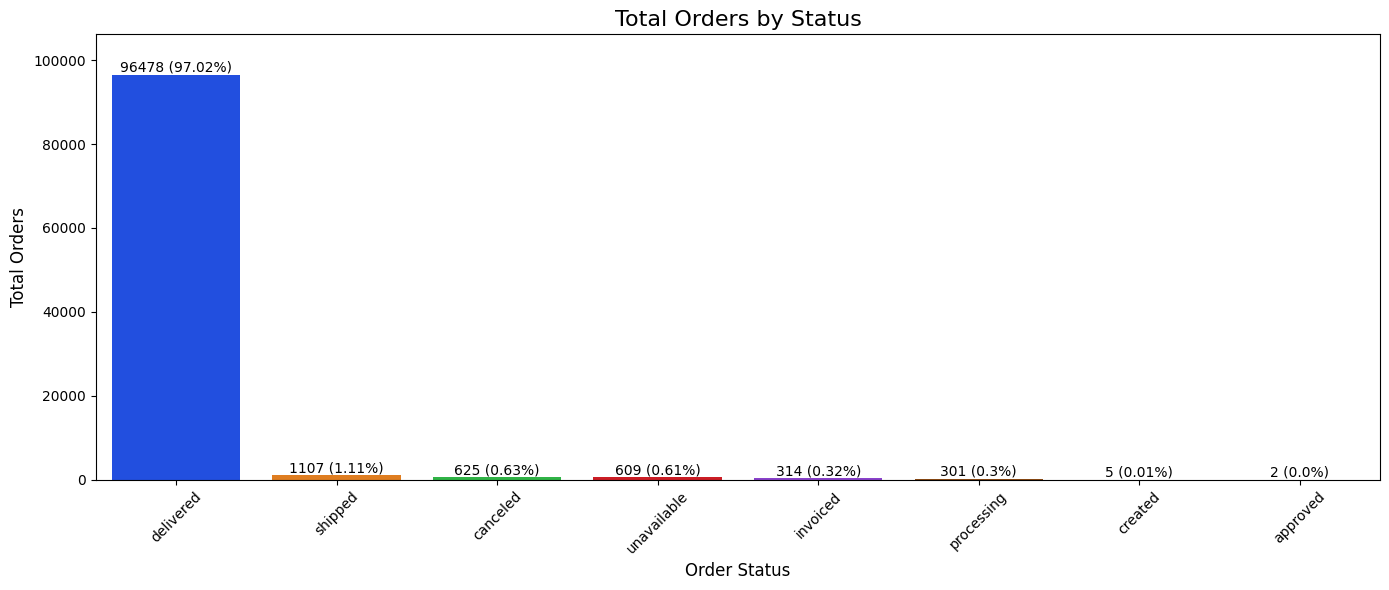

In [42]:
# Deduplicate the dataset to ensure one row per unique order
df_unique_orders = df.drop_duplicates(subset=['order_id'])

# Count order statuses and calculate percentages
status_counts = df_unique_orders['order_status'].value_counts().reset_index()
status_counts.columns = ['order_status', 'TotalOrders']

# Calculate percentages
total_orders = status_counts['TotalOrders'].sum()
status_counts['Percentage'] = (status_counts['TotalOrders'] / total_orders * 100).round(2)

# Define a color palette
colors = sns.color_palette("bright", n_colors=len(status_counts))

# Plot total orders by status
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    x='order_status',
    y='TotalOrders',
    data=status_counts,
    palette=colors,
    hue='order_status',
    legend=False
)

# Annotate values and percentages above bars
for bar, count, perc in zip(ax.patches, status_counts['TotalOrders'], status_counts['Percentage']):
    ax.annotate(
        f'{count} ({perc}%)',  # Display total count and percentage
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the top of the bar
        ha='center', 
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add plot title and labels
plt.title('Total Orders by Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)

# Adjust the y-axis limit to avoid overlap between annotations and the top of the bars
plt.ylim(0, status_counts['TotalOrders'].max() * 1.1)

plt.tight_layout()
plt.show()




The graph reveals that the vast majority of orders (approximately 97.02%) were successfully delivered, indicating a highly efficient e-commerce fulfillment process. Other statuses, such as "shipped" (1.11%) and "canceled" (0.63%), represent a very small fraction of total orders. The negligible presence of statuses like "created" and "approved" suggests that most orders progress quickly through the purchasing pipeline.

#### **Monthly Sales Trend**


**Introduction**

Understanding the monthly sales trend is crucial for identifying seasonality and overall growth in the Brazilian e-commerce market. This analysis will provide insights into how total sales evolve over time.

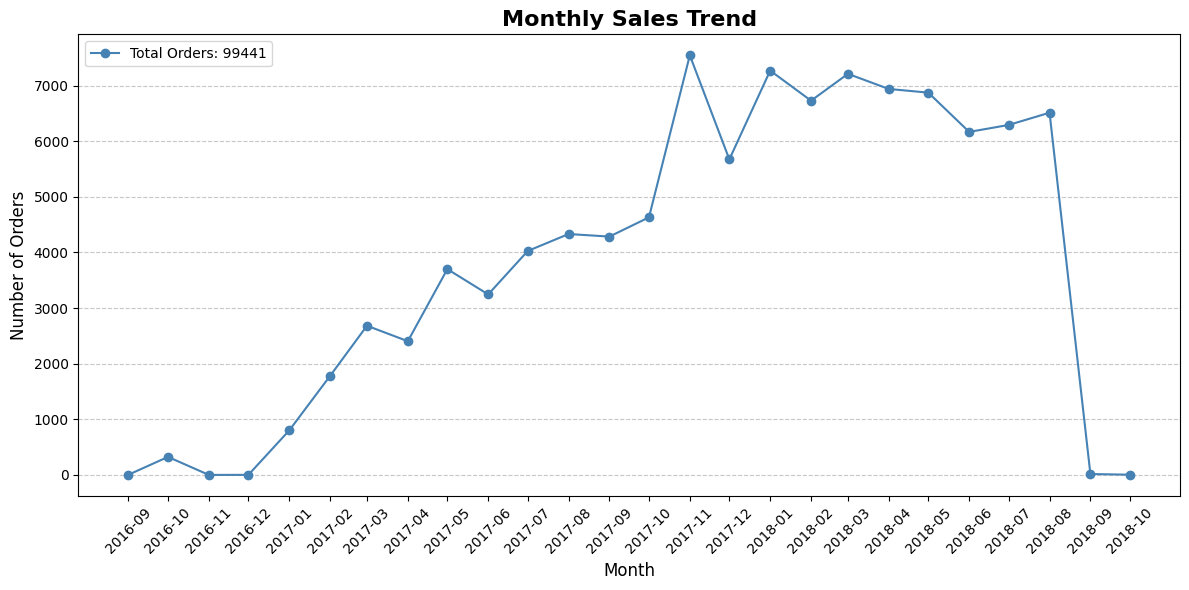

In [53]:
# Convert 'order_purchase_timestamp' to datetime and extract the monthly period
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['date'] = df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# Remove duplicates to ensure one row per unique order
df_unique_orders = df.drop_duplicates(subset=['order_id'])

# Calculate the total number of orders
total_orders = df_unique_orders['order_id'].nunique()

# Determine the full date range
min_date, max_date = df_unique_orders['date'].min(), df_unique_orders['date'].max()

# Generate the complete range of dates
full_date_range = pd.date_range(start=min_date, end=max_date, freq='MS')

# Count the number of orders per month, including missing months
monthly_sales = df_unique_orders.groupby('date').size().reindex(full_date_range, fill_value=0)
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['date', 'Number_of_Orders']

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_sales_df['date'], 
    monthly_sales_df['Number_of_Orders'], 
    marker='o', 
    linestyle='-', 
    color='steelblue',
    label=f'Total Orders: {total_orders}'  # Label with the total number of orders
)

# Customize the X-axis with formatted date labels
plt.xticks(
    ticks=monthly_sales_df['date'], 
    labels=monthly_sales_df['date'].dt.strftime('%Y-%m'), 
    rotation=45, 
    fontsize=10
)

# Add title, labels, and legend
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')  # Position the legend in the upper left corner

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


The graph illustrates a consistent growth in the number of e-commerce orders in Brazil from late 2016 to 2018. The data shows a steady increase in monthly orders, reaching its highest peak in November 2017. This peak highlights a significant surge in e-commerce activity, possibly driven by seasonal promotions or growing consumer trust in online platforms. Following the peak in November 2017, the number of orders fluctuated moderately, maintaining relatively high levels. However, a sharp decline in orders is observed after August 2018, which persisted until October 2018, indicating a potential market slowdown or external factors impacting e-commerce during that period.

#### **Total Orders by Year**

**Introduction**

Analyzing yearly order trends helps identify e-commerce growth and seasonal patterns in Brazil.


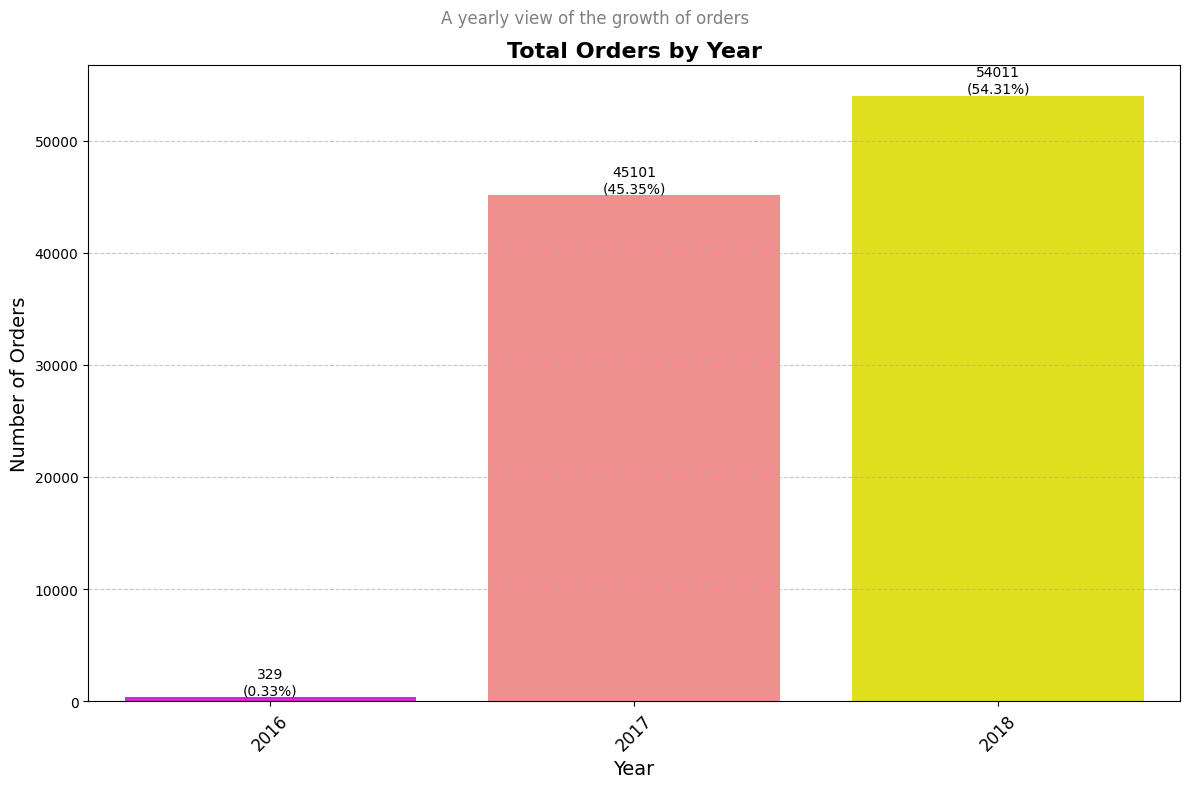

In [57]:
# Extract the 'orders' dataset
orders = datasets['orders']

# Remove duplicates to ensure one row per unique order
df_unique_orders = orders.drop_duplicates(subset=['order_id'])

# Convert 'order_purchase_timestamp' to datetime format
df_unique_orders['order_purchase_timestamp'] = pd.to_datetime(df_unique_orders['order_purchase_timestamp'])

# Extract the year from the 'order_purchase_timestamp' column
df_unique_orders['order_purchase_year'] = df_unique_orders['order_purchase_timestamp'].dt.year

# Calculate the count of orders per year
year_counts = (
    df_unique_orders.groupby('order_purchase_year')['order_id']
    .count()
    .reset_index()
    .rename(columns={'order_id': 'Number_of_Orders'})
)

# Calculate total orders and percentages
total_orders = year_counts['Number_of_Orders'].sum()
year_counts['Percentage'] = (year_counts['Number_of_Orders'] / total_orders * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='order_purchase_year', 
    y='Number_of_Orders', 
    data=year_counts, 
    palette='spring', 
    hue='order_purchase_year',
    legend=False
)

# Annotate totals and percentages above bars
for bar, count, percentage in zip(ax.patches, year_counts['Number_of_Orders'], year_counts['Percentage']):
    ax.annotate(
        f'{count}\n({percentage:.2f}%)', 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Add titles and labels
plt.title('Total Orders by Year', fontsize=16, fontweight='bold')
plt.suptitle('A yearly view of the growth of orders', fontsize=12, color='gray')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The yearly analysis shows a steady growth in Brazilian e-commerce orders, with the majority of orders placed in 2017 (45.35%) and 2018 (54.31%). Although 2016 accounts for only a small fraction of the total orders (0.33%), it marks the beginning of the observed period, demonstrating the rapid adoption of e-commerce in subsequent years.

#### **Monthly Trends and Yearly Order Comparisons**

**Introduction**

This section analyzes the monthly order trends across different years to uncover patterns and seasonality in e-commerce activities. By comparing the number of orders placed in each month across years, we aim to identify recurring peaks, evaluate growth over time, and detect potential seasonal behaviors.

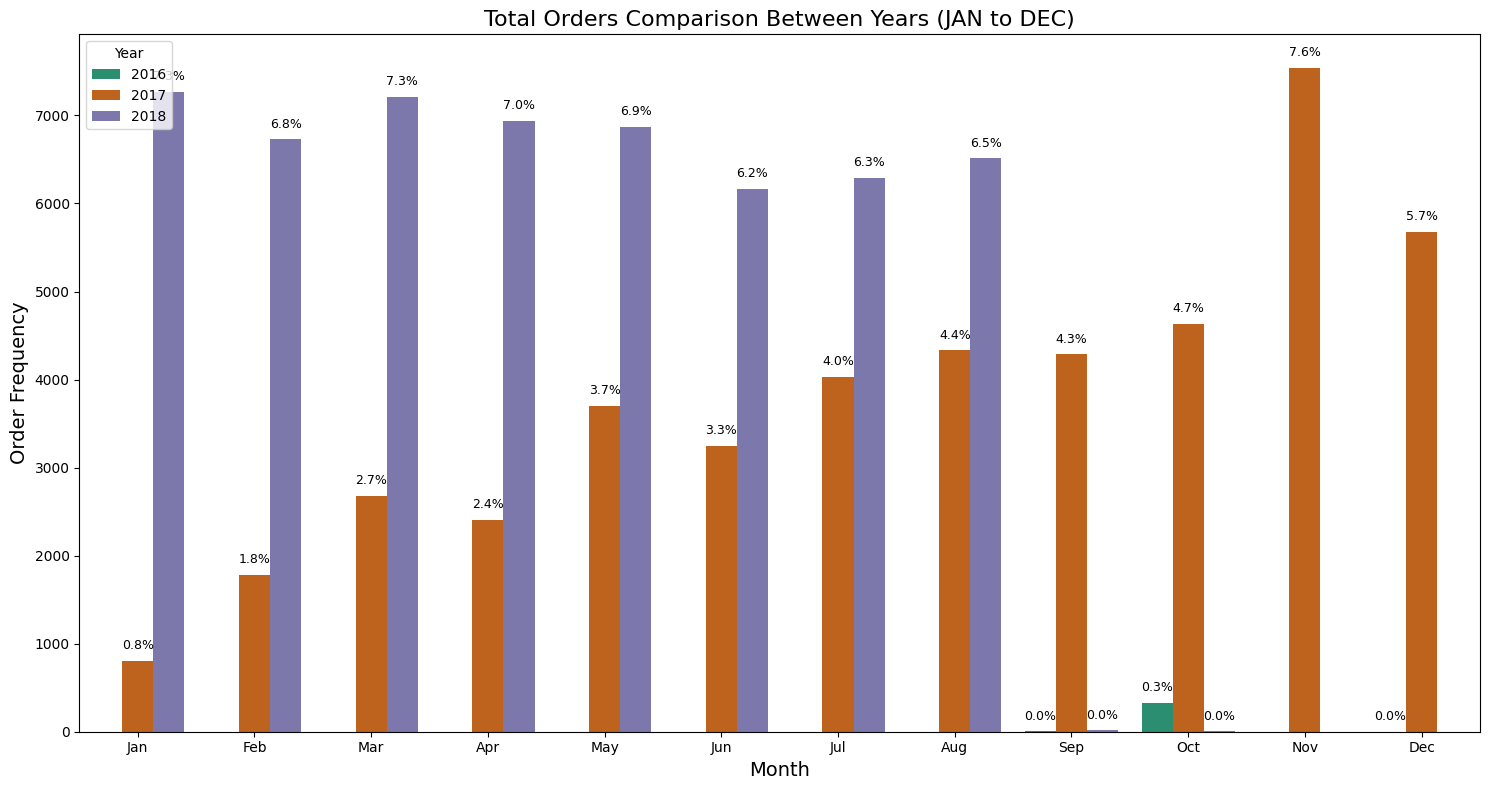

In [58]:
# Select the dataset for analysis
df_orders = datasets['orders']

# Convert 'order_purchase_timestamp' to datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Add columns for month names and years
df_orders['OrderMonth'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['OrderYear'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['OrderMonthName'] = df_orders['OrderMonth'].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

# Ensure no missing or invalid data
df_orders = df_orders.dropna(subset=["order_id", "OrderMonthName"])
df_orders = df_orders[df_orders['order_id'] != 0]

# Count orders by year and month
monthly_orders = (
    df_orders.groupby(['OrderYear', 'OrderMonth', 'OrderMonthName'])
    .size()
    .reset_index(name='OrderCount')
)

# Sort the months for proper ordering in the plot
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_orders['OrderMonthName'] = pd.Categorical(
    monthly_orders['OrderMonthName'], categories=order, ordered=True
)
monthly_orders = monthly_orders.sort_values(["OrderYear", "OrderMonthName"])

# Calculate total orders and percentages
total_orders = monthly_orders['OrderCount'].sum()
monthly_orders['Percentage'] = (monthly_orders['OrderCount'] / total_orders * 100).round(2)

# Plot the data
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=monthly_orders,
    x="OrderMonthName",
    y="OrderCount",
    hue="OrderYear",
    palette="Dark2",
    order=order
)

# Annotate each bar with the percentage
for p in ax.patches:
    if p.get_height() > 0:  # Skip bars with zero height
        percentage = f"{(p.get_height() / total_orders) * 100:.1f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y + 100, percentage, ha="center", va="bottom", fontsize=9)

# Add labels and title
plt.title("Total Orders Comparison Between Years (JAN to DEC)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Order Frequency", fontsize=14)
plt.legend(title="Year", loc="upper left", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


The graph highlights a clear growth in e-commerce orders from 2016 to 2018, with 2018 consistently showing higher order volumes. Peaks are observed in October and November, likely influenced by holiday promotions like Black Friday. Seasonal trends are evident, with order frequencies increasing towards the year-end in both 2017 and 2018.

#### **Total Orders by Day of the Week**

**Introduction**

The day of the week can significantly influence e-commerce order behavior. Understanding the distribution of orders across weekdays helps identify trends, such as peak shopping days. This analysis explores the number of orders placed on each day of the week.

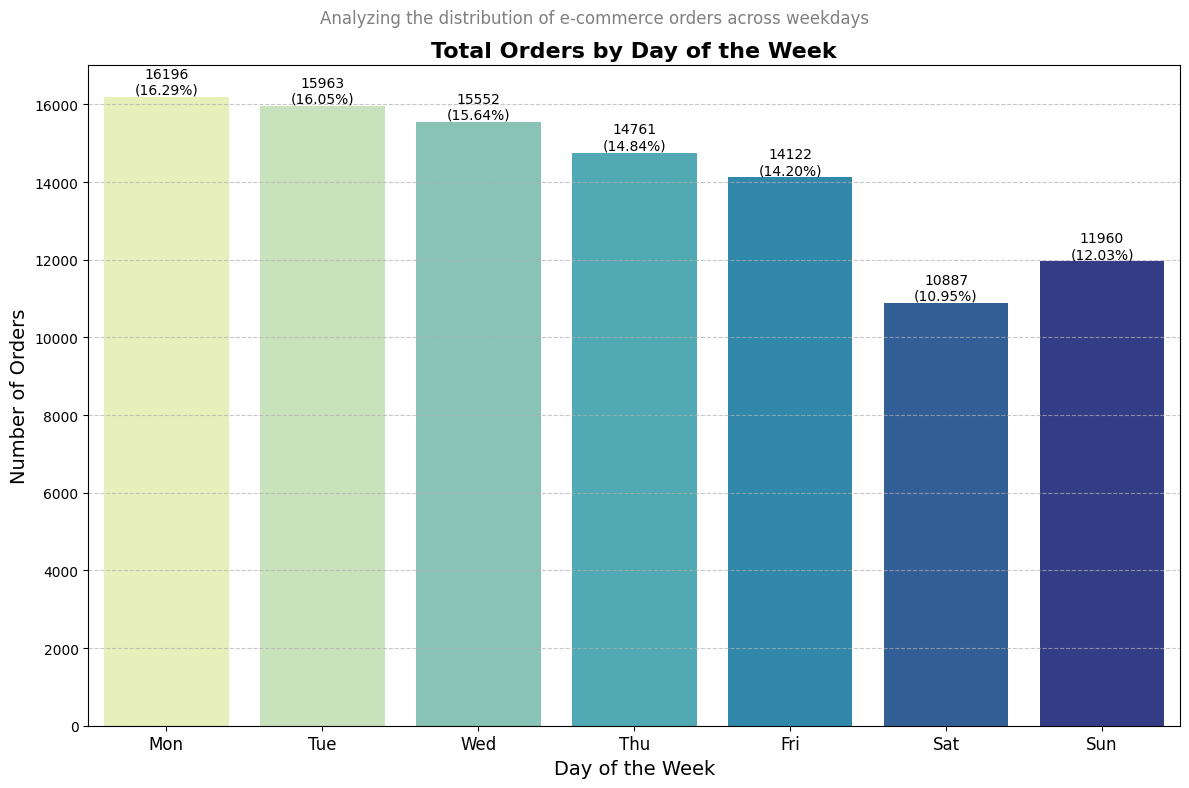

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'order_purchase_timestamp' is in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Deduplicate orders to ensure one row per unique order
df_unique_orders = df.drop_duplicates(subset=['order_id']).copy()

# Extract day of the week (0 = Monday, 6 = Sunday)
df_unique_orders['OrderPurchaseDayOfWeek'] = df_unique_orders['order_purchase_timestamp'].dt.dayofweek

# Calculate order counts by day of the week
day_of_week_counts = (
    df_unique_orders.groupby('OrderPurchaseDayOfWeek')
    .size()
    .reset_index(name='Number_of_Orders')
)

# Define weekday labels
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week_counts['Day'] = day_of_week_counts['OrderPurchaseDayOfWeek'].apply(lambda x: weekday_labels[x])

# Calculate percentages
total_orders = day_of_week_counts['Number_of_Orders'].sum()
day_of_week_counts['Percentage'] = (
    (day_of_week_counts['Number_of_Orders'] / total_orders) * 100
).round(2)

# Sort the data by day of the week for correct order in the plot
day_of_week_counts = day_of_week_counts.sort_values('OrderPurchaseDayOfWeek')

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Day',
    y='Number_of_Orders',
    data=day_of_week_counts,
    palette='YlGnBu', 
    hue='Day',
    legend=False
)

# Add annotations (order counts and percentages)
for index, row in day_of_week_counts.iterrows():
    plt.text(index, row['Number_of_Orders'], 
             f"{row['Number_of_Orders']}\n({row['Percentage']:.2f}%)", 
             ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Total Orders by Day of the Week', fontsize=16, fontweight='bold')
plt.suptitle('Analyzing the distribution of e-commerce orders across weekdays', fontsize=12, color='gray')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Set x-axis labels to weekdays
plt.xticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


The distribution of orders is relatively consistent across weekdays, with Monday and Tuesday having the highest order volumes at 16.29% and 16.05%, respectively. Weekends show a decline, with Saturday and Sunday accounting for 10.95% and 12.03% of orders.

#### **Total Orders by Time of the Day**

**Introduction**

Understanding the time of day when most orders are placed helps identify customer behavior patterns and optimize operations. This analysis categorizes orders into different time periods, including Dawn, Morning, Afternoon, and Night, to uncover peak activity hours.

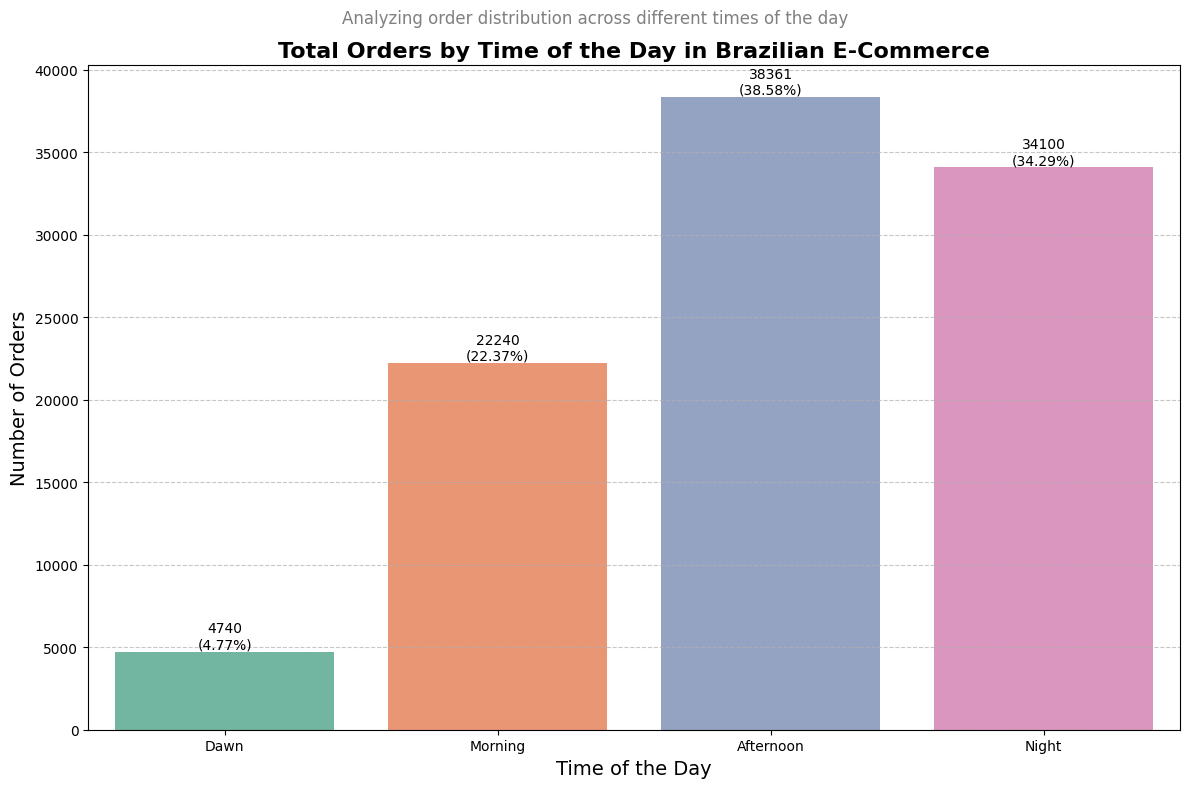

In [34]:
# Ensure 'order_purchase_timestamp' is in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Deduplicate the dataset to ensure one row per unique order
df_unique_orders = df.drop_duplicates(subset=['order_id']).copy()

# Extract hour from 'order_purchase_timestamp'
df_unique_orders.loc[:, 'OrderPurchaseHour'] = df_unique_orders['order_purchase_timestamp'].dt.hour

# Define function to categorize orders by time of day
def categorize_time(hour):
    if hour < 6:
        return 'Dawn'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Categorize orders by time of day
df_unique_orders.loc[:, 'OrderPurchaseTimeDay'] = df_unique_orders['OrderPurchaseHour'].apply(categorize_time)

# Count orders by time of day
time_of_day_counts = (
    df_unique_orders.groupby('OrderPurchaseTimeDay')['order_id']
    .count()
    .reset_index(name='Number_of_Orders')
)

# Ensure correct order of time labels
time_label_order = ['Dawn', 'Morning', 'Afternoon', 'Night']
time_of_day_counts['OrderPurchaseTimeDay'] = pd.Categorical(
    time_of_day_counts['OrderPurchaseTimeDay'], 
    categories=time_label_order, 
    ordered=True
)
time_of_day_counts = time_of_day_counts.sort_values('OrderPurchaseTimeDay')

# Calculate percentages
total_orders = time_of_day_counts['Number_of_Orders'].sum()
time_of_day_counts['Percentage'] = (
    (time_of_day_counts['Number_of_Orders'] / total_orders) * 100
).round(2)

# Plot total orders by time of day
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='OrderPurchaseTimeDay',
    y='Number_of_Orders',
    data=time_of_day_counts,
    hue='OrderPurchaseTimeDay',  # Add hue for color separation
    palette=sns.color_palette("Set2", n_colors=len(time_label_order)),
    dodge=False,
    legend=False
)

# Annotate totals and percentages above bars
for bar, row in zip(ax.patches, time_of_day_counts.itertuples()):
    ax.annotate(
        f'{row.Number_of_Orders}\n({row.Percentage:.2f}%)',
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add titles and labels
plt.title('Total Orders by Time of the Day in Brazilian E-Commerce', fontsize=16, fontweight='bold')
plt.suptitle('Analyzing order distribution across different times of the day', fontsize=12, color='gray')
plt.xlabel('Time of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



The majority of orders in Brazil occur during the Afternoon (38.58%) and Night (34.29%), indicating a preference for online shopping during these times. Mornings account for 22.37%, while the least activity is observed during Dawn (4.77%).

#### **Top 10 Product Categories**

**Introduction**

Analyzing the most popular product categories based on the number of orders.

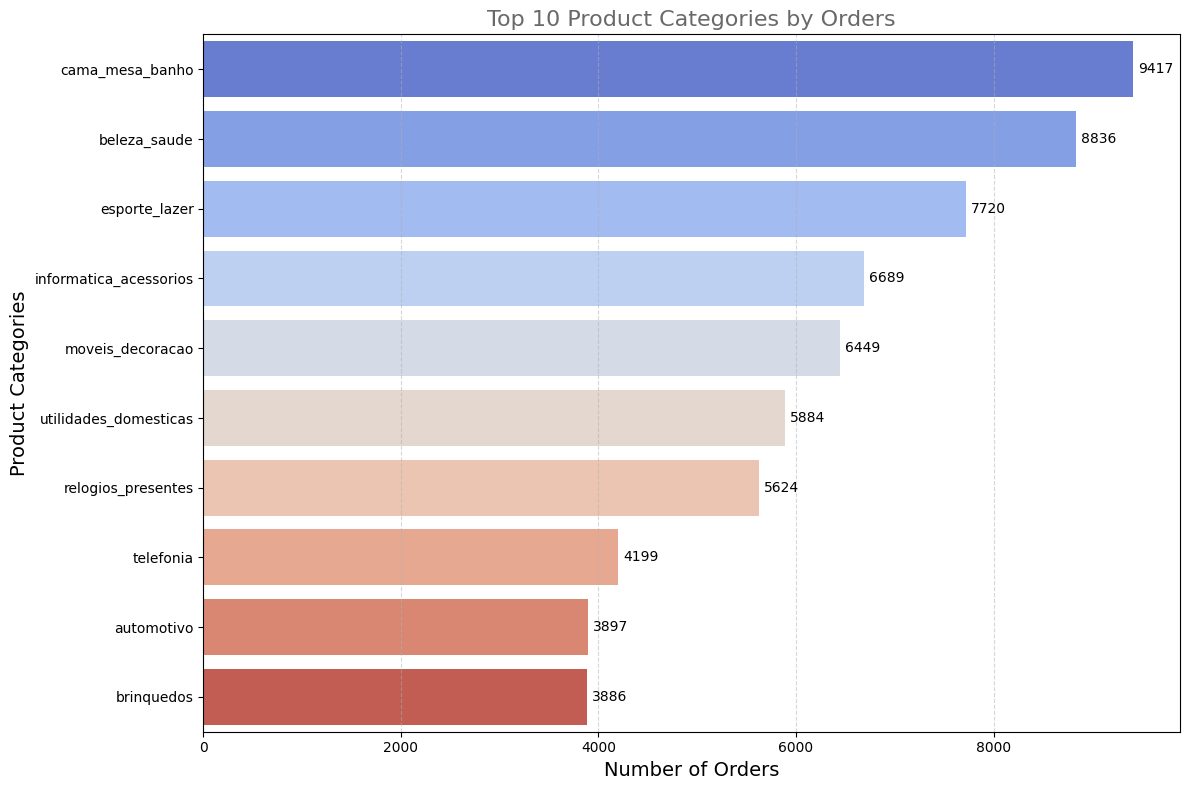

In [23]:

# Remove duplicates to ensure each category is counted only once per order
unique_orders = df[['order_id', 'product_category_name']].drop_duplicates()

# Group by product categories and calculate the number of unique orders
category_order_counts = (
    unique_orders.groupby('product_category_name')['order_id']
    .count()  # Count unique orders per category
    .reset_index(name='Number_of_Orders')  # Rename the column
    .sort_values(by='Number_of_Orders', ascending=False)  # Sort in descending order
)

# Calculate the total number of orders
total_orders = category_order_counts['Number_of_Orders'].sum()

# Select the top 10 categories for visualization
top_categories = category_order_counts.head(10)

# Visualization
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top_categories,
    x='Number_of_Orders',
    y='product_category_name',
    palette='coolwarm',
    hue='product_category_name',
    legend=False
)

# Annotate values on the bars
for bar, row in zip(ax.patches, top_categories.itertuples()):
    ax.text(
        bar.get_width() + 50,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically center the annotation
        f"{row.Number_of_Orders}", 
        va='center',  # Vertically align to the center of the bar
        ha='left',  # Align text to the left to appear outside the bar
        fontsize=10,
        color='black'  # Black color for contrast
    )

# Add titles and labels
plt.title("Top 10 Product Categories by Orders", fontsize=16, color="dimgrey")
plt.xlabel("Number of Orders", fontsize=14)
plt.ylabel("Product Categories", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()


The top 10 product categories in Brazilian e-commerce are composed of "Cama, Mesa e Banho" with 9417 orders, followed by "Beleza e Saúde" and "Esporte e Lazer," reflecting strong demand for household, personal care, and recreational products.


#### **Proportion of Total Sales by Payment Type**

**Introduction**

Analyzing the distribution of total sales across different payment methods to identify consumer preferences in Brazilian e-commerce by Olist.

1. Distribution of payment installments to identify consumer preferences in credit terms.
2. The evolution of payment types over time to track trends.
3. The proportion of total transactions by payment type to highlight popular payment methods.

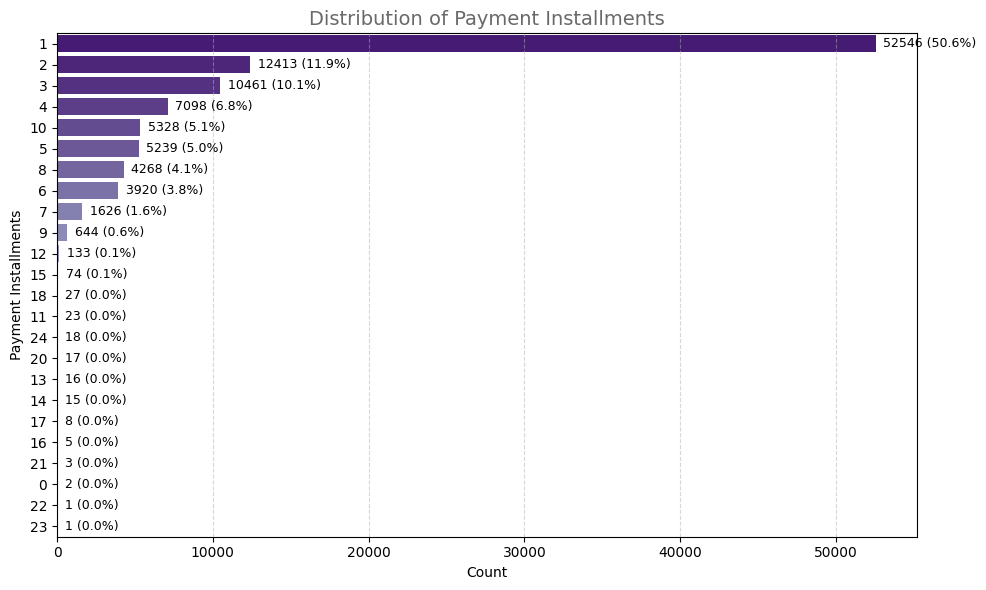

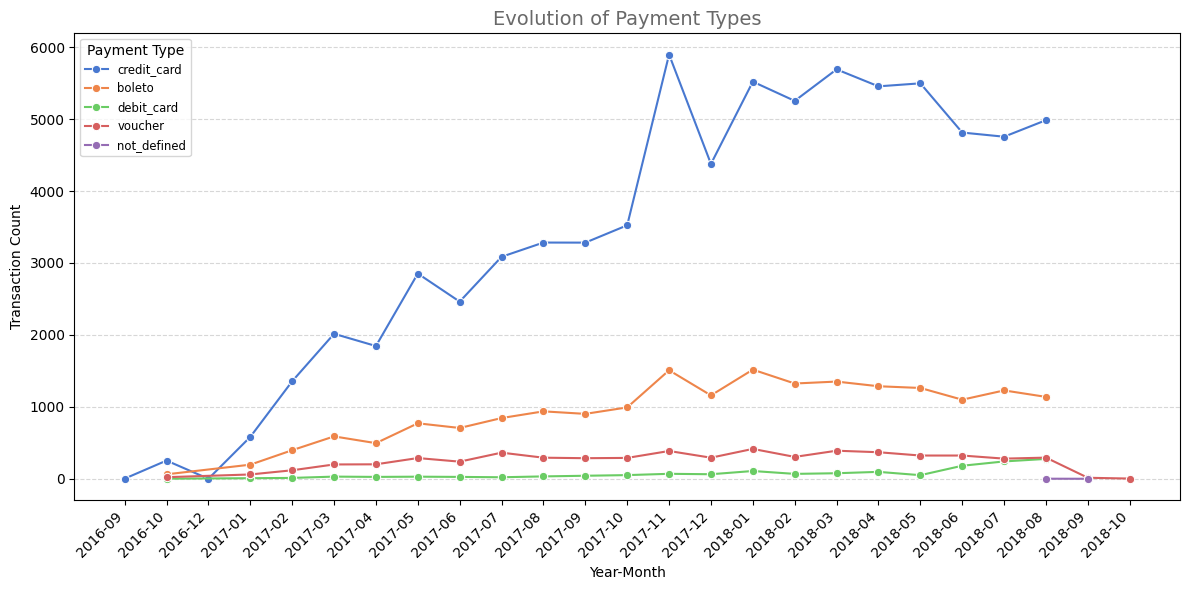

In [5]:
# Dataset Selection (assume `datasets` é um dicionário de DataFrames do pandas)
df_order_payment = datasets['order_payments']
df_orders = datasets['orders']

# Fix: Add 'order_purchase_year_month' column to df_orders
df_orders['order_purchase_year_month'] = pd.to_datetime(df_orders['order_purchase_timestamp']).dt.to_period('M').astype(str)

# Plot 1: Distribution of Payment Installments
installments_count = (
    df_order_payment.groupby('payment_installments')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Check if the DataFrame is empty
if installments_count.empty:
    print("No data available for Payment Installments.")
else:
    # Calculate percentages
    installments_count['percentage'] = (
        (installments_count['count'] / installments_count['count'].sum()) * 100
    )

    # Plot the bar chart
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    ax1 = sns.barplot(
        y=installments_count['payment_installments'].astype(str),  # Convert to string for categorical plotting
        x=installments_count['count'],
        palette='Purples_r',
        hue=installments_count['payment_installments'].astype(str),
        legend=False
    )

    # Annotate percentages and counts directly inside or at the end of each bar
    for bar, row in zip(ax1.patches, installments_count.iterrows()):
        row_data = row[1]  # Extract row data
        ax1.text(
            bar.get_width() + 500,  # Adjust text position to the end of the bar
            bar.get_y() + bar.get_height() / 2,  # Center the text vertically in the bar
            f"{int(row_data['count'])} ({row_data['percentage']:.1f}%)",  # Combine count and percentage
            va='center',  # Center alignment vertically
            ha='left',  # Align text to the left
            fontsize=9,
            color='black'
        )

    # Set titles and labels
    ax1.set_title('Distribution of Payment Installments', fontsize=14, color='dimgrey')
    ax1.set_xlabel('Count')
    ax1.set_ylabel('Payment Installments')
    ax1.grid(axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


# Plot 2: Evolution of Payment Types
payment_evl = (
    pd.merge(df_order_payment, df_orders, on='order_id', how='inner')
    .groupby(['order_purchase_year_month', 'payment_type'])
    .size()
    .reset_index(name='count')
    .sort_values(by='order_purchase_year_month')
)

# Ensure unique values for the x-axis and order by month
payment_evl = payment_evl.sort_values(by='order_purchase_year_month').drop_duplicates(subset=['order_purchase_year_month', 'payment_type'])

# Lineplot for payment evolution with unique x-axis values
plt.figure(figsize=(12, 6))
ax2 = sns.lineplot(
    data=payment_evl,
    x='order_purchase_year_month',
    y='count',
    hue='payment_type',
    palette='muted',
    marker='o'
)

# Dynamically set unique x-axis labels
unique_months = payment_evl['order_purchase_year_month'].unique()
ax2.set_xticks(range(len(unique_months)))
ax2.set_xticklabels(unique_months, rotation=45, ha='right')

# Set titles and labels
ax2.set_title('Evolution of Payment Types', fontsize=14, color='dimgrey')
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Transaction Count')
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.legend(title='Payment Type', loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

# Plot 3: Proportion of Transactions by Payment Type
payment_type_totals = (
    df_order_payment.groupby('payment_type')
    .size()
    .reset_index(name='total')
)

# Calculate percentages
payment_type_totals['percentage'] = (
    (payment_type_totals['total'] / payment_type_totals['total'].sum()) * 100
)

# Create pie chart with Plotly
fig_pie = px.pie(
    data_frame=payment_type_totals,
    names='payment_type',
    values='total',
    title='Proportion of Transactions by Payment Type',
    color_discrete_sequence=px.colors.qualitative.Bold,
    hole=0.5
)

# Add hover and central annotations
fig_pie.add_annotation(
    text=f"<b>{payment_type_totals['total'].sum()}</b><br>transactions",
    x=0.5, y=0.5, font_size=16, showarrow=False
)
fig_pie.update_traces(
    textinfo='percent+label',
    hovertemplate=( '<b>Payment Type:</b> %{label}<br>' + '<b>Total Transactions:</b> %{value}<br>' + '<b>Percentage:</b> %{percent}' )
)

# Adjust layout
fig_pie.update_layout(
    title_font_size=16,
    title_x=0.5,
    showlegend=True,
    legend_title_text='Payment Type',
    height=500,
    width=700,
    margin=dict(t=50, b=50, l=50, r=50)
)

fig_pie.show()


**Distribution of Payment Installments:**

- The majority of transactions (50.6%) are made using a single installment, indicating that many customers prefer to pay in full at the time of purchase.
- Two installments account for 11.9% of transactions, followed by three installments at 10.1%.
- Higher installment plans (e.g., 12 or more) represent a negligible fraction of total transactions, suggesting that longer payment plans are less popular.

**Evolution of Payment Types:**

- Credit card usage dominates consistently across the analyzed time period, showing significant growth until a peak in November 2017, followed by slight fluctuations and stabilization in 2018.
- Boleto (bank slips) and vouchers are the second and third most popular payment types, maintaining relatively steady transaction counts throughout the period.
- Debit cards and undefined payment types contribute marginally to the overall transaction volume.

**Proportion of Transactions by Payment Type:**

- Credit card transactions constitute the largest share of total payments, with 73.9%.
- Boleto follows at 19%, while vouchers make up 5.56%.
- Debit cards account for only 1.47% of the transactions, and a negligible 0.003% fall under the not_defined category.

#### **Order Distribution and Regional Analysis in Brazil**

**Introduction**

This analysis provides insights into the e-commerce order distribution in Brazil, focusing on the evolution of orders across regions, identifying the top cities with the highest customer orders, and examining order distribution by state. Using Brazilian geolocation data, we enrich the dataset with regional information and ensure accurate geospatial representation. The analysis spans from September 2016 to October 2018.

**Load Datasets and Fetch Region Information from IBGE**

In [23]:
import pandas as pd
import requests

# Fetch region information from IBGE API
response = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')

if response.status_code == 200:
    content = response.json()
else:
    raise Exception("Failed to fetch data from IBGE API")

# Create a DataFrame with region information
br_info = pd.DataFrame([{
    'customer_state': region['UF']['sigla'],  # State abbreviation
    'state_name': region['UF']['nome'],      # State name
    'region_name': region['UF']['regiao']['nome']  # Region name
} for region in content])

# Drop duplicates in case there are redundant entries
br_info.drop_duplicates(inplace=True)

# Preview the DataFrame
print(br_info.head())


   customer_state state_name region_name
0              RO   Rondônia       Norte
2              AC       Acre       Norte
4              AM   Amazonas       Norte
8              RR    Roraima       Norte
10             PA       Pará       Norte


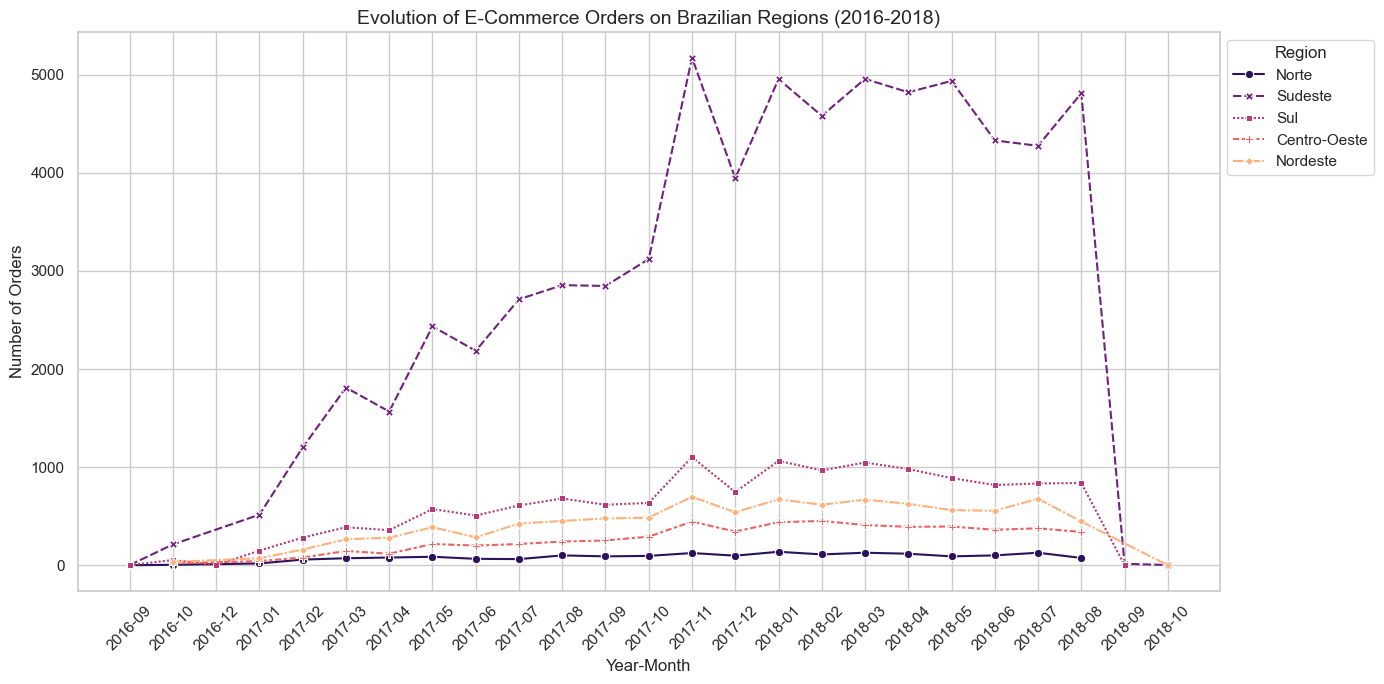

In [24]:
# Dataset Selection
df_orders = datasets['orders']
df_customers = datasets['customers']

# Add 'order_purchase_year_month' column to df_orders
df_orders['order_purchase_year_month'] = pd.to_datetime(df_orders['order_purchase_timestamp']).dt.strftime('%Y%m')

# Merge orders with customers
df_orders_customers = pd.merge(
    df_orders,
    df_customers,
    on='customer_id',
    how='inner'
)

# Merge orders with region information (assume `br_info` is already a pandas DataFrame)
df_orders_regions = pd.merge(
    df_orders_customers,
    br_info,
    on='customer_state',
    how='left'
)

# Filter data within the specified range (201609 to 201810)
df_orders_filtered = df_orders_regions[
    (df_orders_regions['order_purchase_year_month'] >= '201609') &
    (df_orders_regions['order_purchase_year_month'] <= '201810')
]

# Group by region_name and order_purchase_year_month
df_regions_group = df_orders_filtered.groupby(['order_purchase_year_month', 'region_name']).size().reset_index(name='order_count')

# Format the month column to "YYYY-MM"
df_regions_group['order_purchase_year_month'] = df_regions_group['order_purchase_year_month'].apply(
    lambda x: f"{x[:4]}-{x[4:]}"
)
df_regions_group.rename(columns={'order_purchase_year_month': 'month'}, inplace=True)

# Sort by 'month' in ascending order to ensure correct order on the X-axis
df_regions_group = df_regions_group.sort_values(by='month', ascending=True)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the line chart
plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=df_regions_group,
    x='month',
    y='order_count',
    hue='region_name',
    style='region_name',
    markers=True,
    palette='magma'
)

# Set unique x-axis ticks and labels
ax.set_xticks(range(len(df_regions_group['month'].unique())))  # Define tick positions
ax.set_xticklabels(df_regions_group['month'].unique(), rotation=45)  # Set tick labels

# Set titles and labels
ax.set_title('Evolution of E-Commerce Orders on Brazilian Regions (2016-2018)', size=14)
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)

# Adjust legend and layout
ax.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



The chart shows that the Sudeste region dominates e-commerce orders, with a significant peak in late 2017. Other regions, like Sul, Centro-Oeste, Norte, and Nordeste, show stable but much lower activity, highlighting regional disparities in e-commerce adoption. A decline in orders across all regions is noticeable toward late 2018, potentially due to seasonal or market factors.

**Group Data by City**

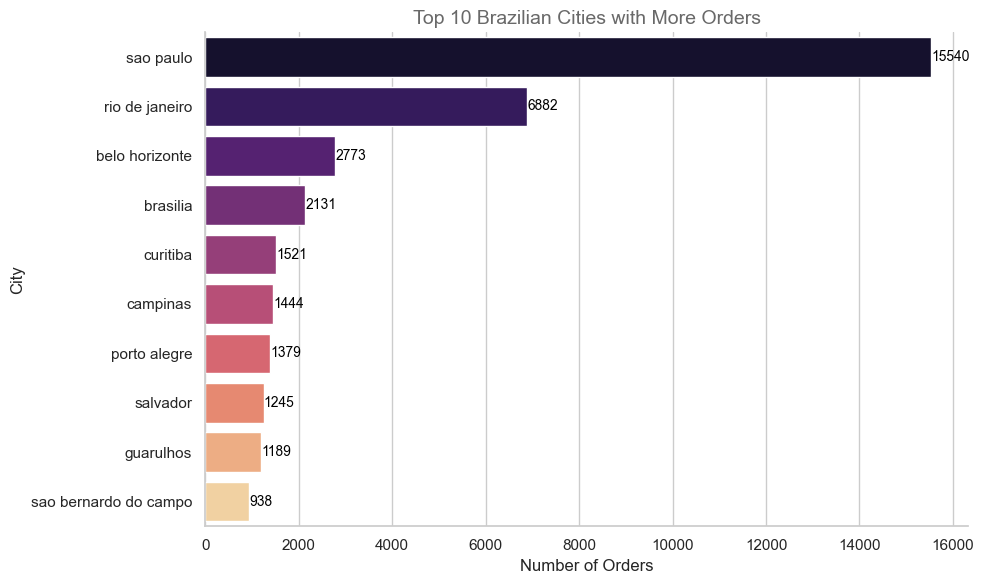

In [25]:
# Group data by city and count the number of orders
df_cities_group = df_orders_filtered.groupby('customer_city').agg(
    order_count=('order_id', 'size')
).reset_index()

# Sort cities by order count in descending order
df_cities_group = df_cities_group.sort_values(by='order_count', ascending=False).reset_index(drop=True)

# Select the top 10 cities
df_cities_top10 = df_cities_group.iloc[:10, :]

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the bar chart
ax = sns.barplot(
    y='customer_city',
    x='order_count',
    data=df_cities_top10,
    palette='magma', 
    hue='customer_city', 
    legend=False
)

# Add annotations to the bars
for index, row in df_cities_top10.iterrows():
    ax.text(
        row['order_count'] + 5,  # Slightly to the right of the bar
        index,  # Position at the center of the bar
        f"{int(row['order_count'])}",  # Display the order count
        va='center',  # Center vertically
        ha='left',  # Align text to the left of the bar
        fontsize=10,
        color='black'
    )

# Format the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add chart title and labels
ax.set_title('Top 10 Brazilian Cities with More Orders', size=14, color='dimgrey')
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_ylabel('City', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


This chart highlights the dominance of **São Paulo** and **Rio de Janeiro** as the top cities for e-commerce orders in Brazil, with São Paulo leading significantly. Other cities like Belo Horizonte and Brasília follow at a much lower scale, showing a concentration of e-commerce activity in key metropolitan areas. The remaining cities have a more balanced and lower contribution. This reflects Brazil's regional economic disparities and the prominence of its largest urban centers in online shopping.

**Group Data by State**


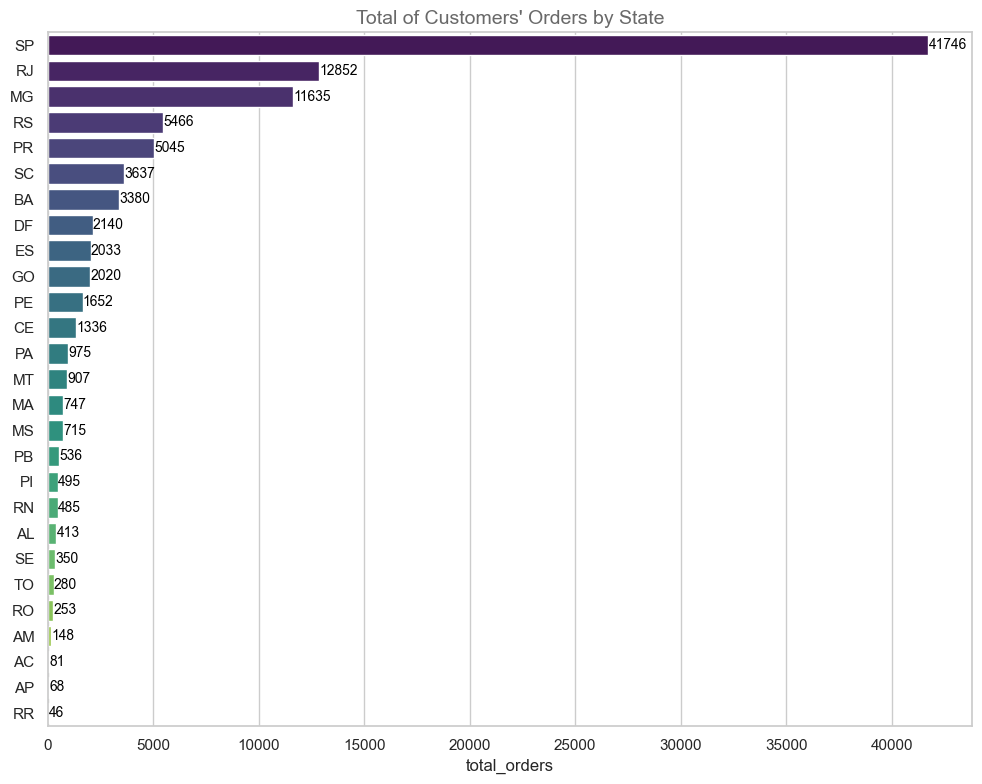

In [26]:
# Group the filtered data by state and count the total orders
df_state_totals = df_orders_filtered.groupby('customer_state').agg(
    total_orders=('order_id', 'size')  # Count the total number of orders for each state
).reset_index()

# Sort the DataFrame by total orders in descending order
df_state_totals = df_state_totals.sort_values(by='total_orders', ascending=False).reset_index(drop=True)

# Set plot size and style
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Create a horizontal barplot
ax = sns.barplot(
    y="customer_state",
    x="total_orders",
    data=df_state_totals,
    palette="viridis", 
    hue="customer_state",
    legend=False

)

# Add a title to the plot
ax.set_title("Total of Customers' Orders by State", size=14, color="dimgrey")

# Remove the Y-axis label for simplicity
ax.set_ylabel("")

# Add labels to the bars
for index, row in df_state_totals.iterrows():
    ax.text(
        row['total_orders'] + 10,  # Position slightly to the right of the bar
        index,  # Position vertically at the bar center
        f"{row['total_orders']}",  # Display the total orders as text
        va='center',  # Center text vertically
        ha='left',  # Align text to the left of the bar
        fontsize=10,
        color='black'
    )

# Adjust layout for better readability
plt.tight_layout()
plt.show()


The chart highlights a significant concentration of e-commerce orders in **São Paulo (SP)**, which accounts for the majority of orders, followed by **Rio de Janeiro (RJ)** and **Minas Gerais (MG)**. These three states dominate the e-commerce landscape in Brazil, reflecting their economic importance and higher population densities. States like Rio Grande do Sul (RS) and Paraná (PR) show moderate activity, while northern and northeastern states have significantly lower order volumes, indicating regional disparities in e-commerce adoption. This suggests that e-commerce businesses may find opportunities to grow in less represented regions.

#### **Customer Distribution in Brazil: A 3,000 Sample from 2018 Orders Visualized on a Map**

**Introduction**

This code visualizes customer distribution in Brazil using a 2018 orders dataset. It merges geolocation and order data to create an interactive map with up to 3,000 unique locations, clustered dynamically for efficient visualization.

In [27]:
df_geolocation = datasets['geolocation']  # Load the geolocation dataset

# Rename column to facilitate the merge
df_geolocation = df_geolocation.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'})

# Merge datasets using ZIP code as the key
df_merged = pd.merge(
    df,  # The main dataset containing orders
    df_geolocation,  # Geolocation dataset
    on='customer_zip_code_prefix',  # Merge on the ZIP code column
    how='inner'  # Perform an inner join to get matching entries only
)

# Create the 'order_purchase_year' column by extracting the year from 'order_purchase_timestamp'
df_merged['order_purchase_year'] = pd.to_datetime(df_merged['order_purchase_timestamp']).dt.year

# Filter the dataset for a specific year (e.g., 2018)
df_filtered = df_merged[df_merged['order_purchase_year'] == 2018]

# Select unique locations based on latitude and longitude
df_filtered_locations = df_filtered[['geolocation_lat', 'geolocation_lng']].dropna().drop_duplicates()

# Limit the number of locations to avoid memory issues (example: 3,000 locations)
locations = list(zip(
    df_filtered_locations['geolocation_lat'][:3000],  # Latitude
    df_filtered_locations['geolocation_lng'][:3000]  # Longitude
))

# Create the map with Folium, centered on Brazil with an initial zoom level of 4
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Add clustered markers to the map using the FastMarkerCluster plugin
FastMarkerCluster(data=locations).add_to(map1)

# Display the map
map1


**High Density in São Paulo:** The largest cluster (2,271 orders) is centered in São Paulo, highlighting its role as Brazil's economic hub and most populous state.

**Moderate Clusters:** Cities like Salvador (149 orders), Brasília (542 orders), and Fortaleza (12 orders) also exhibit notable customer activity, reflecting significant population centers.

**Sparse Distribution in the North:** The northern regions, including Manaus (26 orders), show significantly lower customer activity compared to the southeast, indicating a less dense population and economic activity.

### **E-commerce Financial Analysis**

**Introduction**

After exploring order volumes and customer behavior, we now shift focus to the financial side of e-commerce. This includes analyzing order values, freight costs, and other monetary aspects to understand the revenue and expenses driving the platform.

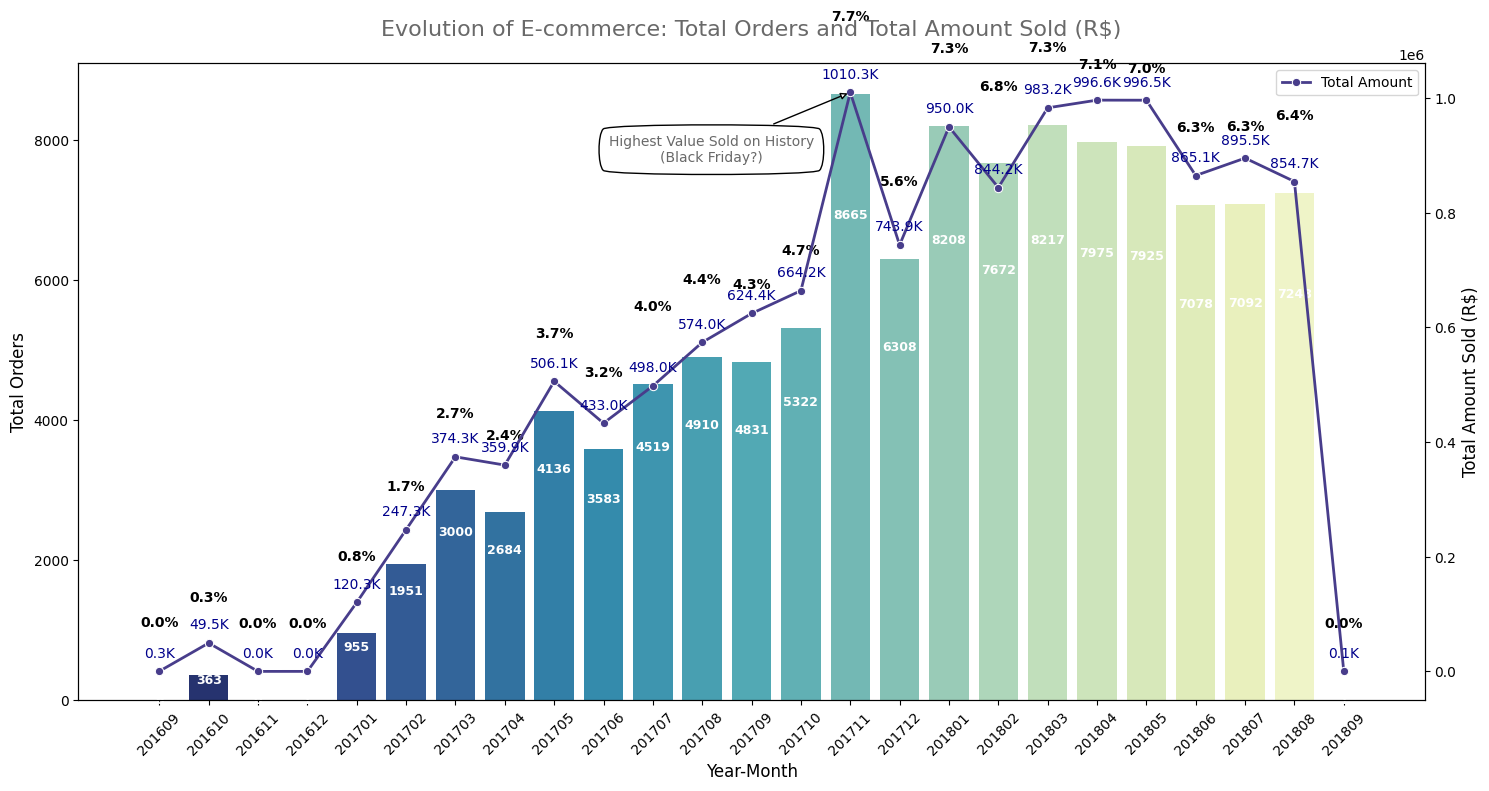

In [6]:
# Assuming 'datasets' contains the 'orders' and 'order_items' DataFrames
orders = datasets['orders']
order_items = datasets['order_items']

# Extract the year and year-month for grouping purposes
orders['order_purchase_year'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.year
orders['order_purchase_year_month'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.strftime('%Y%m')

# Merge 'orders' and 'order_items' to filter and enrich the data
df_orders_filt = orders.merge(order_items, on='order_id', how='inner')

# Group data by year and year-month
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False).agg({
    'order_id': 'count',  # Count total orders
    'price': 'sum',  # Sum total price
    'freight_value': 'sum'  # Sum freight values
})

# Add calculated columns for price per order and freight cost per order
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']

# Ensure all months are included, filling gaps with zeroes
all_months = pd.date_range(start=df_month_aggreg['order_purchase_year_month'].min() + "01", 
                           end=df_month_aggreg['order_purchase_year_month'].max() + "01", 
                           freq='MS').strftime('%Y%m').tolist()

df_month_aggreg = df_month_aggreg.set_index('order_purchase_year_month').reindex(all_months).reset_index()
df_month_aggreg.rename(columns={'index': 'order_purchase_year_month'}, inplace=True)
df_month_aggreg.fillna(0, inplace=True)

# Calculate percentage of orders for each month
total_orders = df_month_aggreg['order_id'].sum()
df_month_aggreg['order_percentage'] = (df_month_aggreg['order_id'] / total_orders) * 100


# Create the figure and primary axis for barplot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot total orders as a barplot with hue
sns.barplot(x='order_purchase_year_month', y='order_id', data=df_month_aggreg, hue='order_purchase_year_month',
            dodge=False, palette='YlGnBu_r', ax=ax1, legend=False)

# Add total orders inside or on top of the bars
for i, row in df_month_aggreg.iterrows():
    ax1.text(i, row['order_id'] - (row['order_id'] * 0.2), f"{int(row['order_id'])}", 
             ha='center', va='center', fontsize=9, color='white', fontweight='bold')

# Add percentage annotations above the bars
for i, row in df_month_aggreg.iterrows():
    ax1.text(i, row['order_id'] + 1000, f"{row['order_percentage']:.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Plot total sales on a secondary axis (lineplot)
ax2 = ax1.twinx()
sns.lineplot(x='order_purchase_year_month', y='price', data=df_month_aggreg, ax=ax2, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Amount')

# Annotate monetary values near the points of the line chart
for x, y in enumerate(df_month_aggreg['price']):
    ax2.annotate(f"{round(y / 1000, 1)}K", xy=(x, y), textcoords="offset points", xytext=(0, 10),
                 ha='center', color='darkblue', fontsize=10)

# Highlight the highest value with an annotation
highest_value = df_month_aggreg['price'].max()
highest_month = df_month_aggreg[df_month_aggreg['price'] == highest_value]['order_purchase_year_month'].values[0]
ax2.annotate(
    f'Highest Value Sold on History\n(Black Friday?)', 
    xy=(df_month_aggreg[df_month_aggreg['order_purchase_year_month'] == highest_month].index[0], highest_value),
    xytext=(-100, -50), textcoords='offset points', 
    bbox=dict(boxstyle="round4", fc="w", pad=.8),
    arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center'
)

# Format the chart
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size=16, color='dimgrey', pad=20)
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Total Orders', fontsize=12)
ax2.set_ylabel('Total Amount Sold (R$)', fontsize=12)

# Fix the x-axis labels
ax1.set_xticks(range(len(df_month_aggreg['order_purchase_year_month'])))
ax1.set_xticklabels(df_month_aggreg['order_purchase_year_month'], rotation=45)

# Adjust layout spacing
plt.tight_layout()
plt.show()

From the data, it is evident that the number of orders and total sales grew significantly in 2017, reaching a peak in November 2017, likely due to Black Friday, which is highlighted in the chart. After this period, the number of orders stabilized in 2018, with small fluctuations. The revenue followed a similar trend, showing consistent stability in the post-Black Friday period of 2018. A sharp decline in September 2018 is noticeable, possibly indicating external factors or seasonal behavior in the e-commerce market. Overall, the chart emphasizes the seasonal impacts on e-commerce, with November standing out as a critical month for sales and revenue.

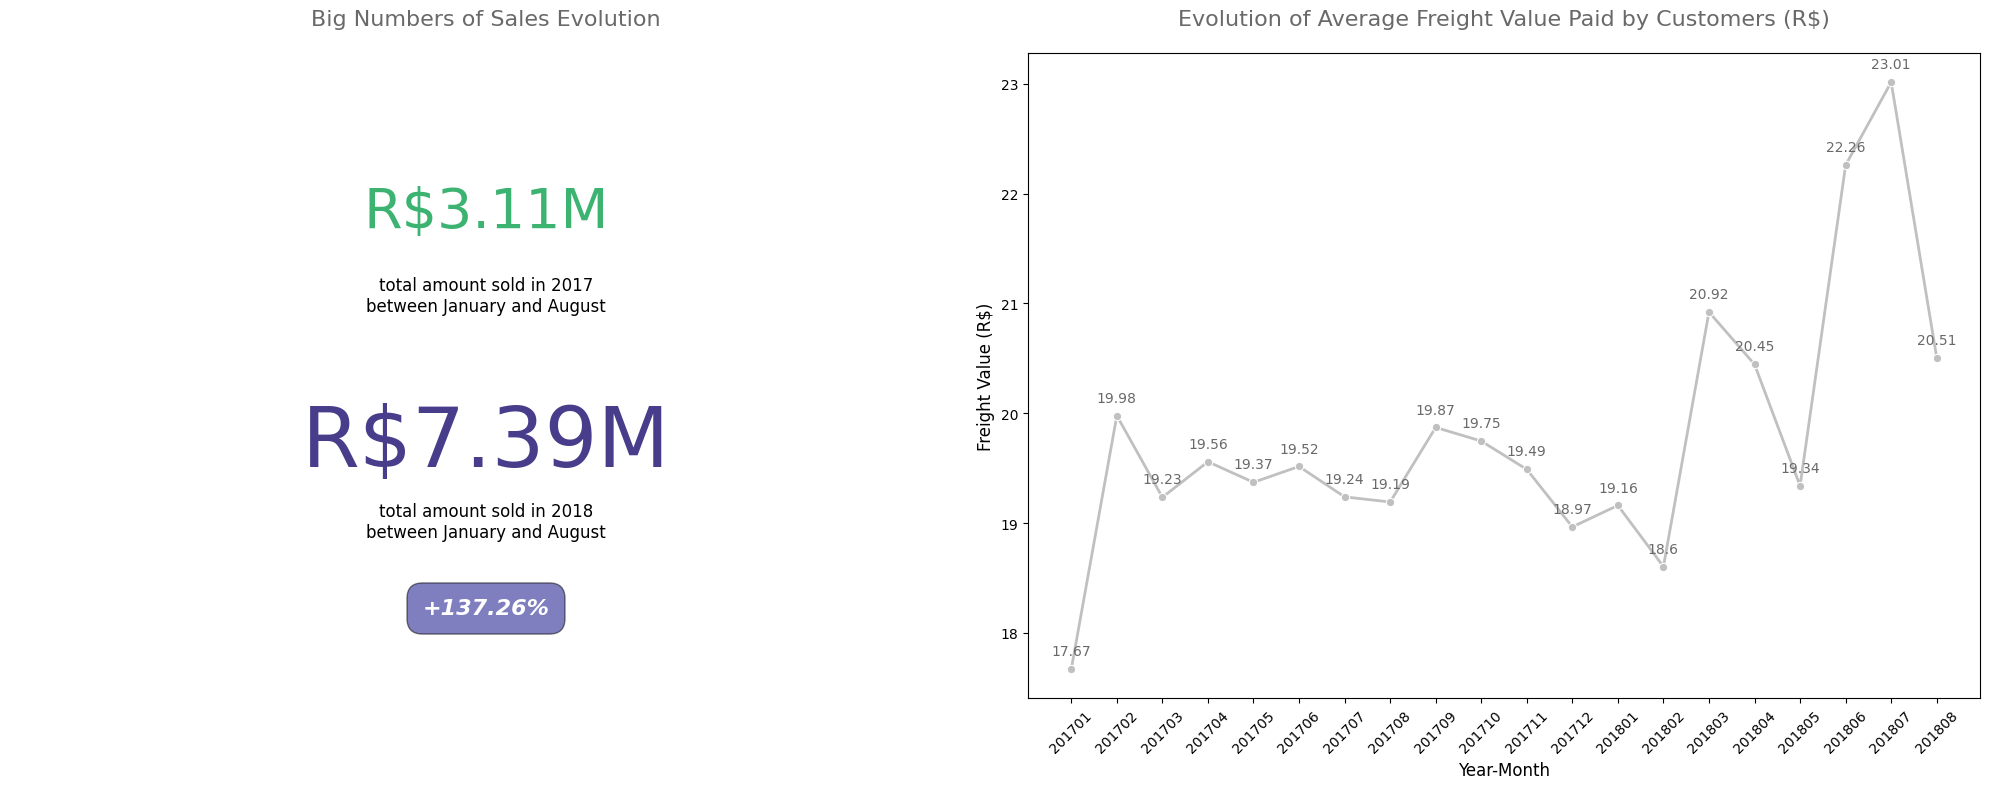

In [7]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1 - Big Numbers of Sales Evolution
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
df_sales_compare = df_month_aggreg.query('order_purchase_year_month in @month_comparison')
sold_2017 = df_sales_compare.query('order_purchase_year == 2017')['price'].sum()
sold_2018 = df_sales_compare.query('order_purchase_year == 2018')['price'].sum()
growth = (sold_2018 - sold_2017) / sold_2017

# Big numbers for 2017
ax1.text(0.50, 0.73, f'R${round(sold_2017 / 1000000, 2)}M', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.50, 0.60, 'total amount sold in 2017\nbetween January and August', fontsize=12, ha='center')

# Big numbers for 2018
ax1.text(0.50, 0.36, f'R${round(sold_2018 / 1000000, 2)}M', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.50, 0.25, 'total amount sold in 2018\nbetween January and August', fontsize=12, ha='center')

# Growth percentage
signal = '+' if growth > 0 else '-'
ax1.text(0.50, 0.13, f'{signal}{round(100 * growth, 2)}%', fontsize=16, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')
ax1.set_title('Big Numbers of Sales Evolution', size=16, color='dimgrey', pad=20)

# Plot 2 - Evolution of Average Freight Value Paid by Customers
df_filtered = df_month_aggreg.query("order_purchase_year_month >= '201701' and order_purchase_year_month <= '201808'")

sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_filtered, linewidth=2, 
             color='silver', marker='o', ax=ax2)

# Format and annotate the freight values
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
for x, y in enumerate(df_filtered.freight_per_order):
    ax2.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 10),
                 ha='center', color='dimgrey')

# Set plot titles and labels
ax2.set_title('Evolution of Average Freight Value Paid by Customers (R$)', size=16, color='dimgrey', pad=20)
ax2.set_xlabel('Year-Month', fontsize=12)
ax2.set_ylabel('Freight Value (R$)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


 On the left, the comparison between 2017 and 2018 sales from January to August shows a significant growth of 137.26%, with total sales increasing from R$3.11M in 2017 to R$7.39M in 2018. This remarkable growth indicates effective strategies, an expanding customer base, or improved product offerings. On the right, the average freight value paid by customers remained relatively stable throughout most of the period, oscillating between R$19.00 and R$20.00. However, a noticeable dip occurred in December 2017, possibly due to holiday promotions or free shipping incentives. In mid-2018, freight costs sharply increased, peaking at R$23.01 in June, which could be attributed to changes in logistics pricing, shipping policies, or carrier rates. This spike warrants further analysis as it may impact profitability and customer satisfaction.

### **Regional Distribution of Total Sales in Brazil**

**Introduction**

The analysis explores how total sales are distributed across Brazilian states, providing insights into regional market dynamics and identifying areas of higher revenue concentration. By understanding these patterns, businesses can better tailor their strategies to meet the demands of customers in different regions, optimize resource allocation, and identify potential growth opportunities. This perspective is crucial for enhancing regional engagement and driving overall business performance.

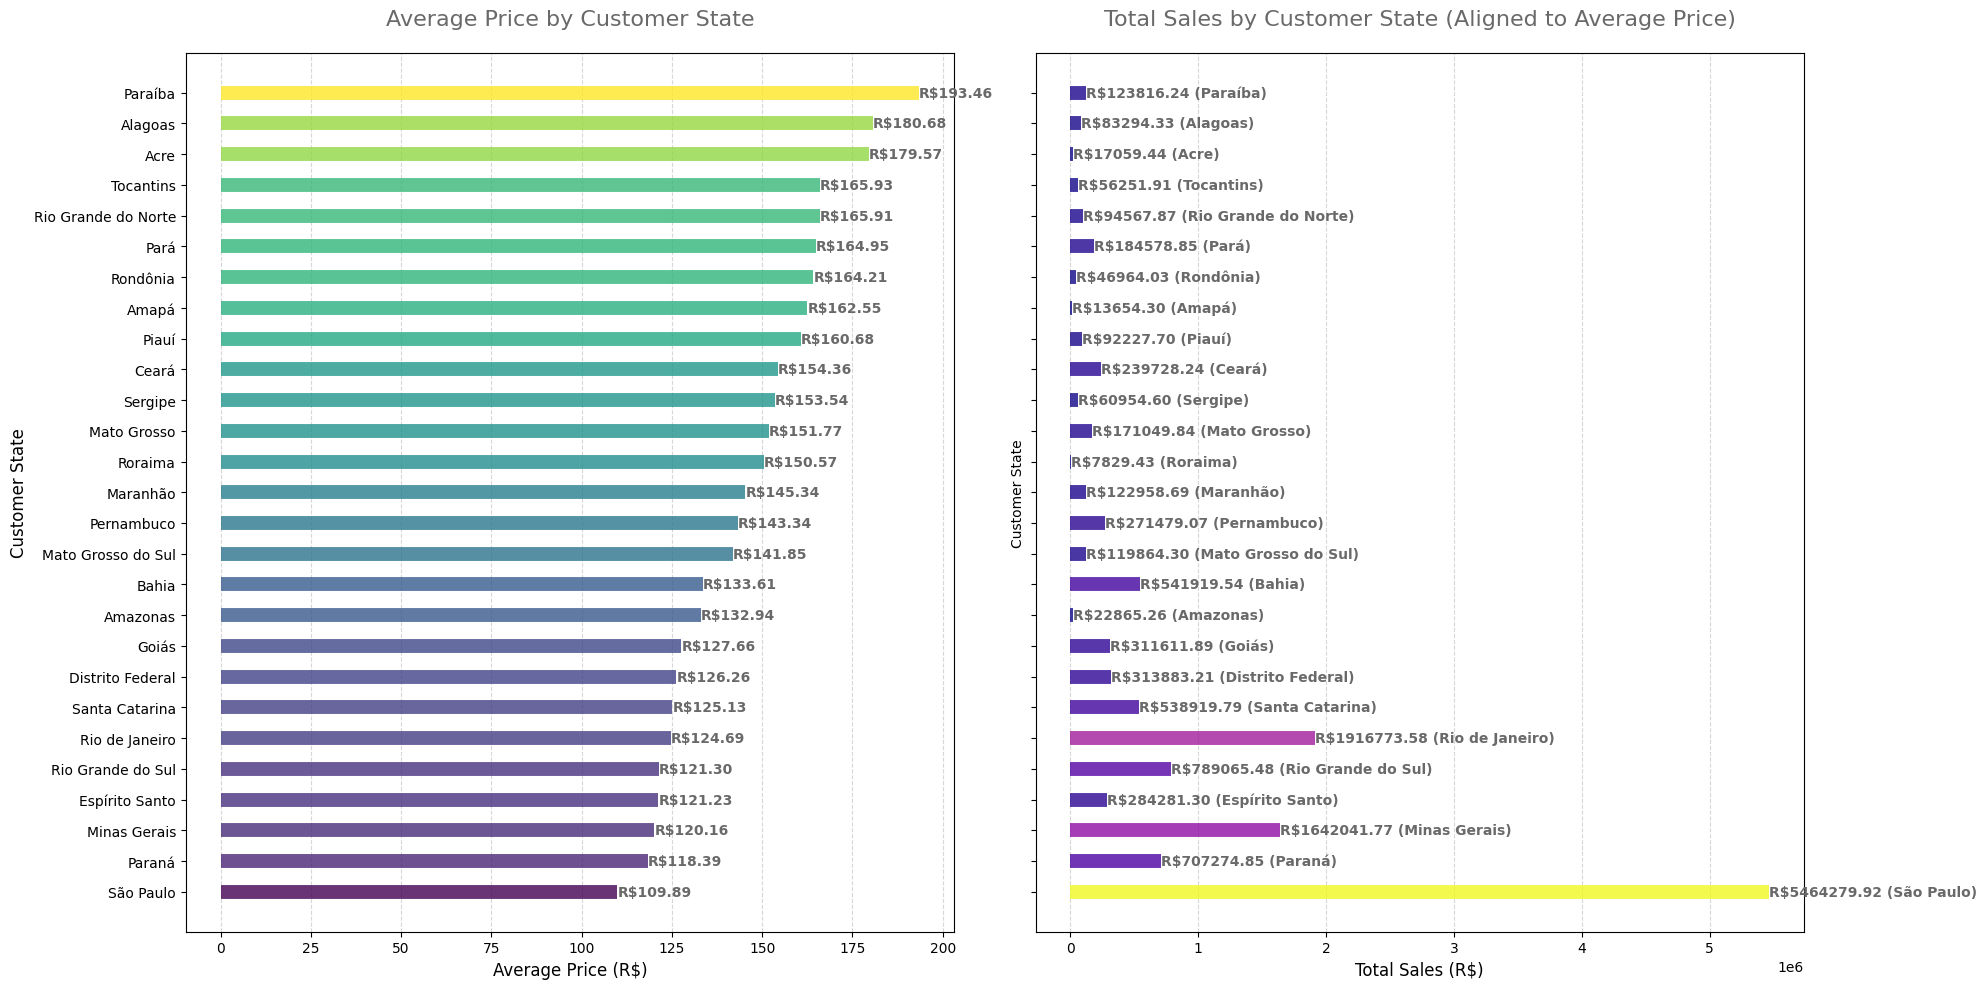

In [17]:
# Grouping data by customer_state for mean and sum of price
state_agg = df.groupby('customer_state').agg(
    total_sales=('price', 'sum'),
    avg_sales=('price', 'mean')  # Ensure accurate calculation of average sales
).reset_index()

state_names = {
    'SP': 'São Paulo', 'RJ': 'Rio de Janeiro', 'MG': 'Minas Gerais', 'RS': 'Rio Grande do Sul',
    'PR': 'Paraná', 'SC': 'Santa Catarina', 'BA': 'Bahia', 'PE': 'Pernambuco',
    'CE': 'Ceará', 'GO': 'Goiás', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo',
    'PA': 'Pará', 'MT': 'Mato Grosso', 'MA': 'Maranhão', 'MS': 'Mato Grosso do Sul',
    'RN': 'Rio Grande do Norte', 'PB': 'Paraíba', 'PI': 'Piauí', 'SE': 'Sergipe',
    'TO': 'Tocantins', 'RO': 'Rondônia', 'AM': 'Amazonas', 'AC': 'Acre', 'AL': 'Alagoas',
    'AP': 'Amapá', 'RR': 'Roraima'
}

# Adding full state names to the DataFrame
state_agg['state_name'] = state_agg['customer_state'].map(state_names)

# Sorting states by avg_sales in descending order for the left plot
state_agg_avg = state_agg.sort_values(by='avg_sales', ascending=False)

# Using the same order for the total_sales plot (right chart)
state_agg_total = state_agg_avg.copy()  # Align the order of the right chart with the left chart

# Create colormaps for the lines
norm_avg = mcolors.Normalize(vmin=state_agg_avg['avg_sales'].min(), vmax=state_agg_avg['avg_sales'].max())
colormap_avg = plt.colormaps.get_cmap('viridis')  # Updated colormap syntax

norm_total = mcolors.Normalize(vmin=state_agg_total['total_sales'].min(), vmax=state_agg_total['total_sales'].max())
colormap_total = plt.colormaps.get_cmap('plasma')  # Updated colormap syntax

# Reverse the order for visualization
state_agg_avg = state_agg_avg.iloc[::-1]
state_agg_total = state_agg_total.iloc[::-1]

# Create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Left Plot: Average Price by Customer State
for i, row in state_agg_avg.iterrows():
    color = colormap_avg(norm_avg(row['avg_sales']))  # Get color from colormap
    ax1.hlines(y=row['state_name'], xmin=0, xmax=row['avg_sales'], color=color, alpha=0.8, linewidth=10)

# Annotate values on the left plot
for i, row in state_agg_avg.iterrows():
    ax1.text(row['avg_sales'], row['state_name'], f"R${row['avg_sales']:.2f}",
            va='center', ha='left', fontsize=10, fontweight='bold', color='dimgrey')

# Titles and labels for the left plot
ax1.set_title('Average Price by Customer State', fontsize=16, pad=20, color='dimgrey')
ax1.set_xlabel('Average Price (R$)', fontsize=12)
ax1.set_ylabel('Customer State', fontsize=12)
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# Right Plot: Total Sales by Customer State (Aligned to avg_sales order)
for i, row in state_agg_total.iterrows():
    color = colormap_total(norm_total(row['total_sales']))  # Get color from colormap
    ax2.hlines(y=row['state_name'], xmin=0, xmax=row['total_sales'], color=color, alpha=0.8, linewidth=10)

# Annotate values and names on the right plot
for i, row in state_agg_total.iterrows():
    ax2.text(row['total_sales'], row['state_name'], f"R${row['total_sales']:.2f} ({row['state_name']})",
            va='center', ha='left', fontsize=10, fontweight='bold', color='dimgrey')

# Titles and labels for the right plot
ax2.set_title('Total Sales by Customer State (Aligned to Average Price)', fontsize=16, pad=20, color='dimgrey')
ax2.set_xlabel('Total Sales (R$)', fontsize=12)
ax2.set_ylabel('Customer State')  # Add the y-axis label to ensure clarity
ax2.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


The analysis of the graphs provides a deeper understanding of the dynamics of sales distribution across Brazilian states. São Paulo stands out with the highest total sales, reaching R$5.46 million, a reflection of its role as Brazil's largest economic hub and the center of significant commercial activity. However, this state also exhibits the lowest average price per transaction at R$109.89, a curious contrast to its dominant total sales figure.

This discrepancy between total sales and average transaction price can be explained by the sheer volume of transactions taking place in São Paulo. As the state likely has a diverse and expansive customer base, it accommodates a wide spectrum of purchasing behaviors. Lower-value purchases in high frequency, such as everyday items or discounted products, contribute to this low average price despite the overwhelming total revenue. Additionally, the highly competitive market in São Paulo, with frequent promotions and sales campaigns, likely plays a role in driving transaction counts while reducing the average ticket size.

In contrast, states like Acre and Alagoas, despite their smaller total sales volumes, report some of the highest average prices, at R$179.57 and R$180.68, respectively. These states may cater to niche markets or specific consumer segments with higher purchasing power or limited competition, resulting in fewer but higher-value transactions. This suggests a more concentrated and less diverse purchasing landscape in these regions.

The data also highlights regional economic disparities. While states like São Paulo and Paraná dominate in total sales due to their large populations and developed markets, smaller states like Acre and Paraíba demonstrate how average transaction size can vary significantly based on market characteristics and consumer behavior. These insights underline the complexity of Brazil's e-commerce landscape, shaped by varying population sizes, regional income distributions, and market competition levels.

Overall, the analysis showcases the multifaceted nature of consumer behavior across Brazilian states, with São Paulo's market volume driving its sales dominance while other states, with fewer but larger transactions, reveal unique market dynamics.

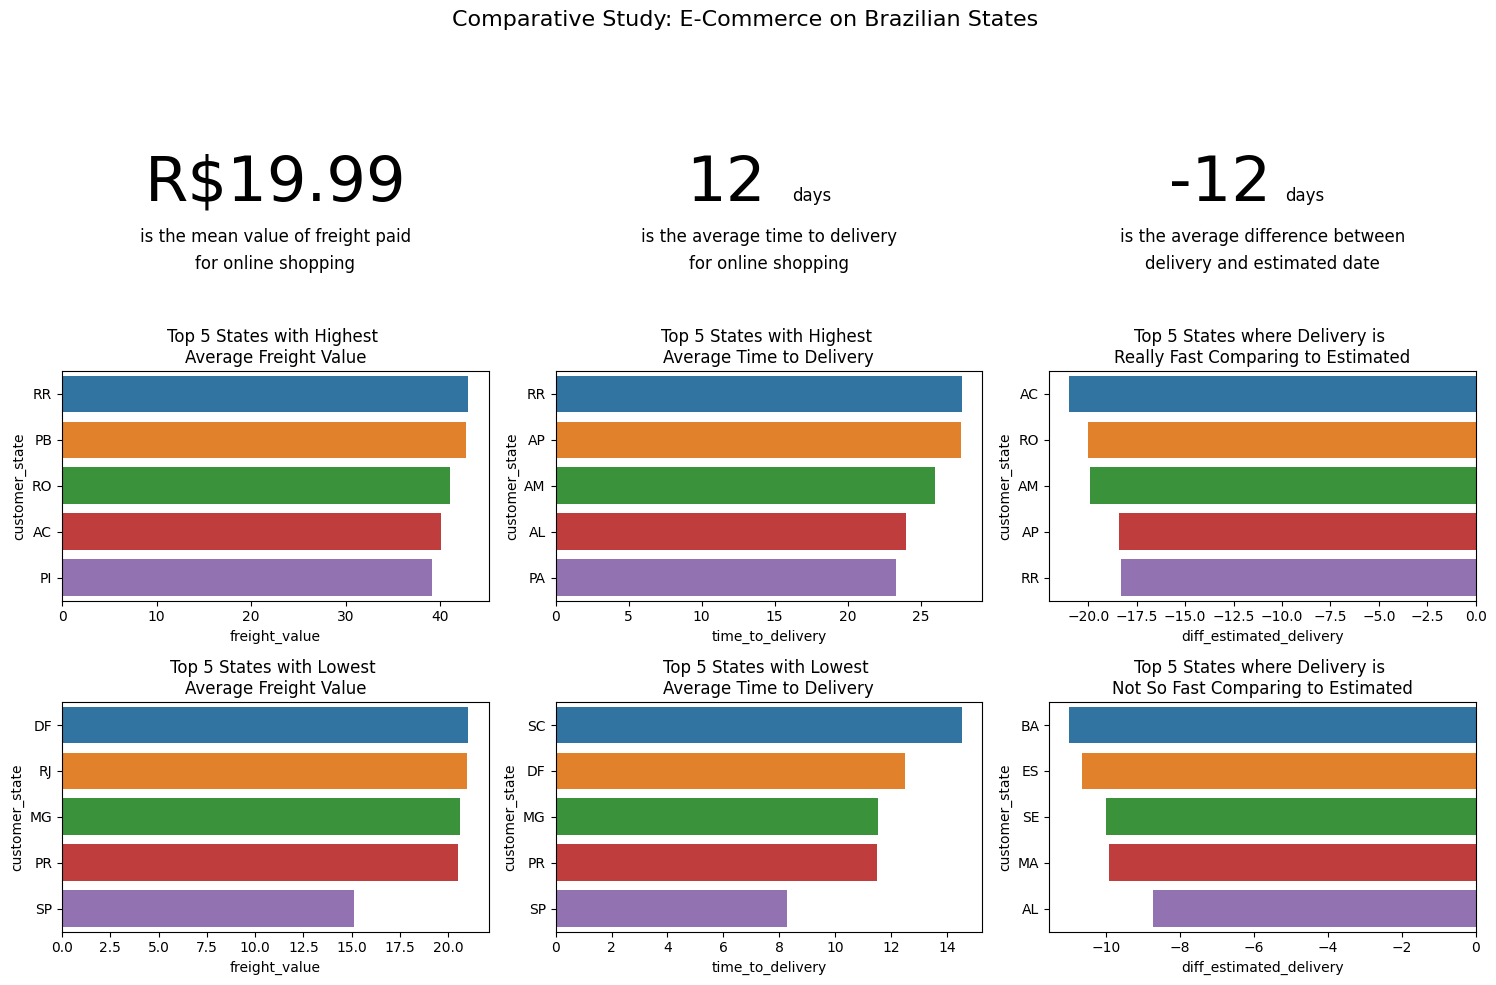

In [9]:
# Assuming datasets are provided
df_customers = datasets['customers']
orders = datasets['orders']
order_items = datasets['order_items']

# Merge 'orders' and 'order_items' to filter and enrich the data
df_orders_filt = orders.merge(order_items, on='order_id', how='inner')

# Ensure date columns are in datetime format
df_orders_filt['order_purchase_timestamp'] = pd.to_datetime(df_orders_filt['order_purchase_timestamp'], errors='coerce')
df_orders_filt['order_delivered_customer_date'] = pd.to_datetime(df_orders_filt['order_delivered_customer_date'], errors='coerce')
df_orders_filt['order_estimated_delivery_date'] = pd.to_datetime(df_orders_filt['order_estimated_delivery_date'], errors='coerce')

# Calculate the difference between actual delivery date and estimated delivery date (in days)
df_orders_filt['diff_estimated_delivery'] = (
    df_orders_filt['order_delivered_customer_date'] - df_orders_filt['order_estimated_delivery_date']
).dt.days

# Calculate total delivery time from purchase to actual delivery (in days)
df_orders_filt['time_to_delivery'] = (
    df_orders_filt['order_delivered_customer_date'] - df_orders_filt['order_purchase_timestamp']
).dt.days

# Perform a join with df_customers to get 'customer_state'
df_orders_filt = df_orders_filt.merge(
    df_customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='inner'
)

# Select only numeric columns for aggregation
numeric_columns = df_orders_filt.select_dtypes(include=['float64', 'int64']).columns

# Grouping data by state and calculating mean only for numeric columns
states_avg_grouped = df_orders_filt.groupby('customer_state')[numeric_columns].mean().reset_index()

# Prepare data subsets for plotting
states_freight_paid = states_avg_grouped[['customer_state', 'freight_value']]
states_time_to_delivery = states_avg_grouped[['customer_state', 'time_to_delivery']]
states_estimated_delivery = states_avg_grouped[['customer_state', 'diff_estimated_delivery']]

# Sorting data
states_freight_paid = states_freight_paid.sort_values(by='freight_value', ascending=False)
states_time_to_delivery = states_time_to_delivery.sort_values(by='time_to_delivery', ascending=False)
states_estimated_delivery = states_estimated_delivery.sort_values(by='diff_estimated_delivery')

# Plotting the results
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot Pack 01 - Freight value paid on states
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.head(), ax=axs[1, 0], hue='customer_state', dodge=False)
axs[1, 0].set_title('Top 5 States with Highest \nAverage Freight Value', size=12, color='black')
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.tail(), ax=axs[2, 0], hue='customer_state', dodge=False)
axs[2, 0].set_title('Top 5 States with Lowest \nAverage Freight Value', size=12, color='black')

# Annotations for Freight Value
axs[0, 0].text(0.50, 0.30, f'R${round(df_orders_filt.freight_value.mean(), 2)}', fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the mean value of freight paid', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 0].axis('off')

# Plot Pack 02 - Time to delivery on states
sns.barplot(x='time_to_delivery', y='customer_state', data=states_time_to_delivery.head(), ax=axs[1, 1], hue='customer_state', dodge=False)
axs[1, 1].set_title('Top 5 States with Highest \nAverage Time to Delivery', size=12, color='black')
sns.barplot(x='time_to_delivery', y='customer_state', data=states_time_to_delivery.tail(), ax=axs[2, 1], hue='customer_state', dodge=False)
axs[2, 1].set_title('Top 5 States with Lowest \nAverage Time to Delivery', size=12, color='black')

# Annotations for Time to Delivery
axs[0, 1].text(0.40, 0.30, f'{int(df_orders_filt.time_to_delivery.mean())}', fontsize=45, ha='center')
axs[0, 1].text(0.60, 0.30, 'days', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.12, 'is the average time to delivery', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 1].axis('off')

# Plot Pack 03 - Difference between delivered and estimated on states
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.head(), ax=axs[1, 2], hue='customer_state', dodge=False)
axs[1, 2].set_title('Top 5 States where Delivery is \nReally Fast Comparing to Estimated', size=12, color='black')
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.tail(), ax=axs[2, 2], hue='customer_state', dodge=False)
axs[2, 2].set_title('Top 5 States where Delivery is \nNot So Fast Comparing to Estimated', size=12, color='black')

# Annotations for Difference Between Delivered and Estimated
axs[0, 2].text(0.40, 0.30, f'{int(df_orders_filt.diff_estimated_delivery.mean())}', fontsize=45, ha='center')
axs[0, 2].text(0.60, 0.30, 'days', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.12, 'is the average difference between', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'delivery and estimated date', fontsize=12, ha='center')
axs[0, 2].axis('off')

plt.suptitle('Comparative Study: E-Commerce on Brazilian States', size=16)
plt.tight_layout()
plt.show()


**Freight Costs:** States such as Roraima (RR), Paraíba (PB), and Rondônia (RO) show the highest average freight costs, while São Paulo (SP) and Rio de Janeiro (RJ) enjoy the lowest freight costs, likely due to better logistical infrastructure.

**Delivery Times:** States in the North and Northeast regions, such as Roraima (RR) and Amazonas (AM), experience the longest delivery times, potentially due to geographical challenges. In contrast, states like São Paulo (SP) and Santa Catarina (SC) have the shortest delivery times, suggesting efficient distribution networks.

**Accuracy of Delivery Estimates:** The North region, particularly states like Acre (AC) and Rondônia (RO), often delivers faster than the estimated time. Conversely, states such as Alagoas (AL) and Maranhão (MA) experience delays compared to their estimated delivery dates.

This analysis highlights the logistical disparities across Brazilian states, with a clear divide between more developed regions (e.g., Southeast) and less accessible regions (e.g., North).

### **Delivery Time by Product Category**

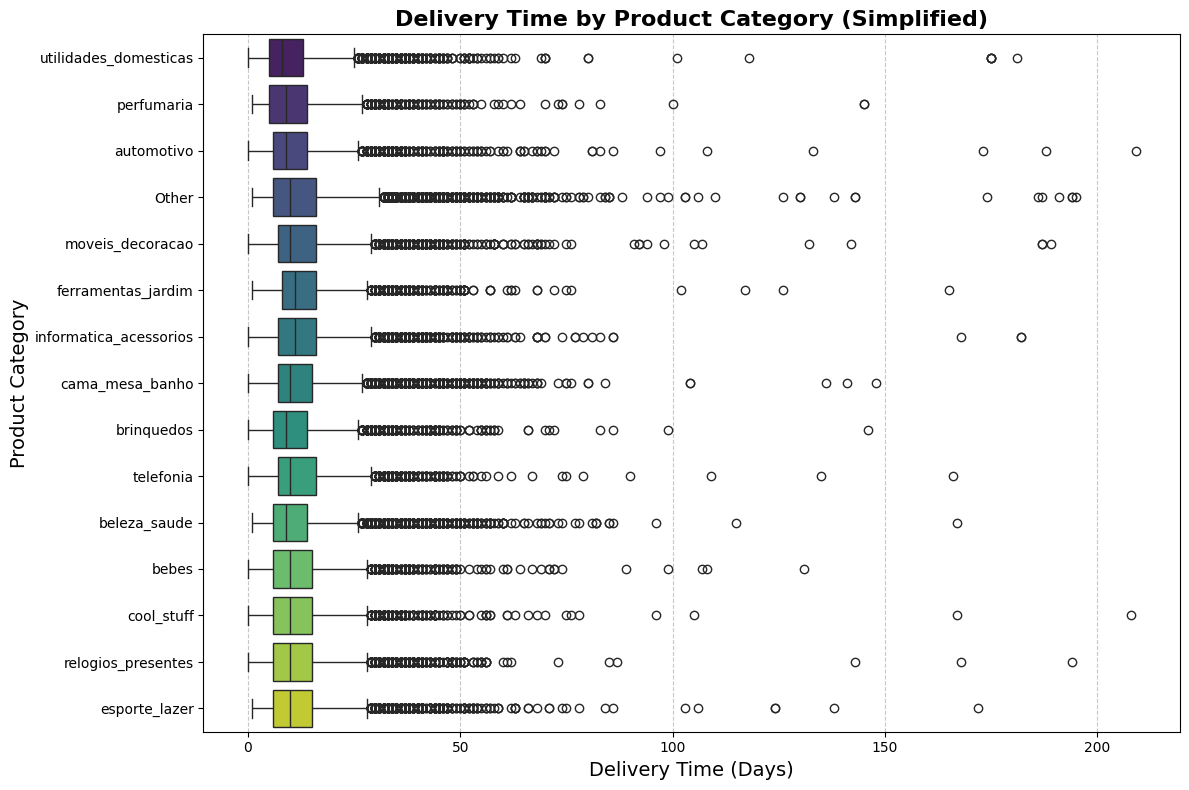

In [14]:
# Ensure date columns are in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')

# Calculate delivery time in days
df['delivery_time'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days

# Count the occurrences of each product category
category_counts = df['product_category_name'].value_counts()

# Set a threshold to decide which categories to keep
threshold = 3000  # Categories with fewer occurrences will be grouped under "Other"
common_categories = category_counts[category_counts >= threshold].index

# Create a new column for simplified categories
df['simplified_category'] = df['product_category_name'].where(
    df['product_category_name'].isin(common_categories), 'Other'
)

# Horizontal box plot for delivery time by simplified product category
plt.figure(figsize=(12, 8))

sns.boxplot(
    x='delivery_time',  # Use the newly calculated delivery time
    y='simplified_category',
    data=df,
    palette='viridis', 
    hue='simplified_category',
    legend=False
)

# Adding titles and labels
plt.title('Delivery Time by Product Category (Simplified)', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


The plot shows the distribution of delivery times across simplified product categories. Most categories have consistent delivery times, with compact interquartile ranges, while categories like "furniture and decoration" and "computer accessories" exhibit higher variability. Categories such as "sports and leisure" and "baby products" demonstrate the shortest median delivery times, reflecting efficient logistics. However, significant outliers are present across all categories, with some deliveries taking over 100 days, indicating potential logistical issues or data errors. The "Other" category, grouping less common products, shows a wide range of delivery times, as expected. Overall, categories like "telephony" and "beauty and health" show more predictable and consistent delivery performance.

### **Delivery Time by Day of the Week**

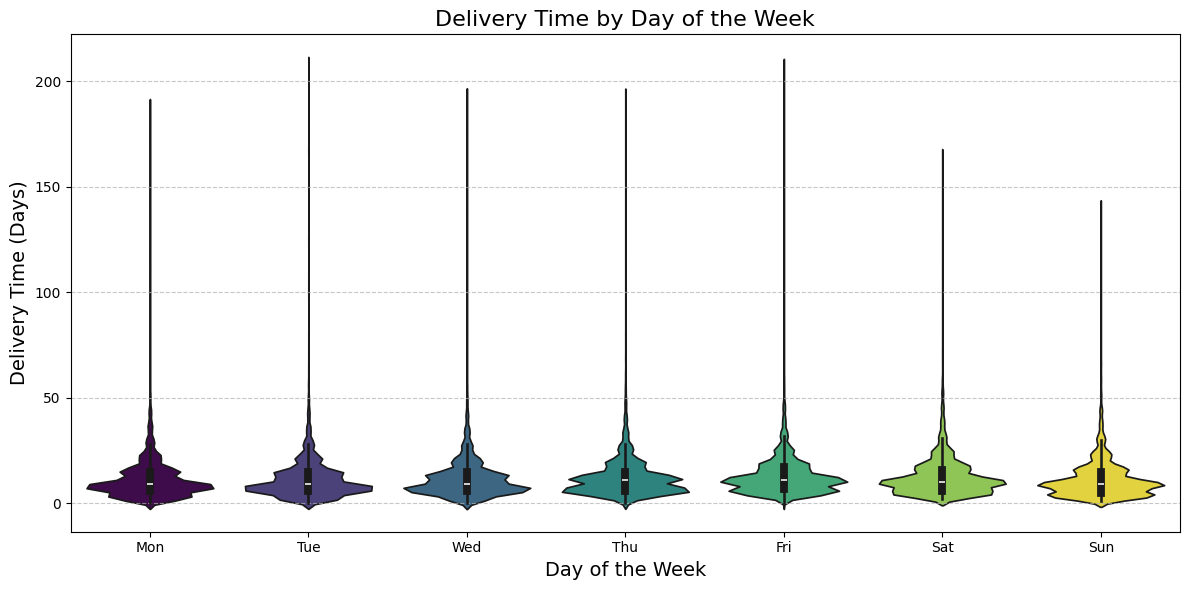

In [16]:
# Ensure the delivery time and day_of_week_int columns are present
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['delivery_time'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days

# Extract the day of the week from the purchase timestamp
df['day_of_week_int'] = df['order_purchase_timestamp'].dt.dayofweek

# Plotting the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='day_of_week_int', y='delivery_time', palette='viridis', hue='day_of_week_int', legend=False)
plt.title('Delivery Time by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Delivery Time (Days)', fontsize=14)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The violin plot shows the distribution of delivery times across days of the week for orders. The delivery time patterns are relatively consistent across all days, with similar median values and compact interquartile ranges. However, there are noticeable outliers for all days, with delivery times exceeding 100 days, indicating potential logistical issues or data inconsistencies. Saturdays and Sundays exhibit slightly narrower distributions, possibly due to fewer orders or streamlined logistics on weekends. Overall, no significant differences in delivery times are observed based on the day of the week.

### **Average Delivery Time by Month**

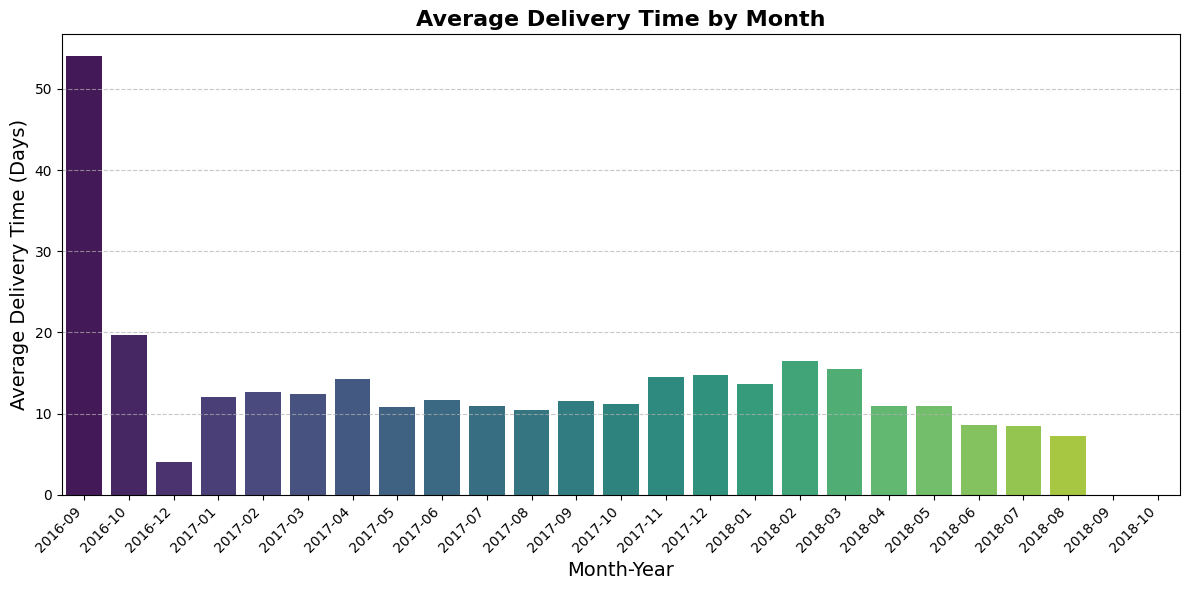

In [18]:
# Ensure date column is in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

# Calculate delivery time in days if not already present
df['delivery_time'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days

# Create a new column for Month-Year
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Calculate the monthly average delivery time
monthly_delivery_time = df.groupby('month_year')['delivery_time'].mean().reset_index()

# Convert 'month_year' to string for proper ordering in the plot
monthly_delivery_time['month_year'] = monthly_delivery_time['month_year'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='delivery_time', data=monthly_delivery_time, palette='viridis', hue='month_year', legend=False)
plt.title('Average Delivery Time by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Average Delivery Time (Days)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar plot illustrates the average delivery time per month over the analyzed period. In September and October 2016, delivery times were significantly higher, exceeding 50 and 20 days on average, respectively. This could indicate logistical challenges or data irregularities during that time. From late 2016 onwards, delivery times stabilized, hovering around 10–15 days on average, with gradual improvement. Starting in mid-2018, delivery times dropped further, reflecting enhancements in logistics or operational efficiency. These trends highlight a clear improvement in delivery performance over time, with notable progress after the initial outlier months.

### **Analysis of Customer Reviews: Insights from Scores and Comments**

**Introduction:**

Customer reviews provide a wealth of information about the quality of products and customer experiences. By analyzing review scores and comments, we can gain valuable insights into overall customer satisfaction and the key themes present in their feedback.

#### **Distribution of Review Scores**

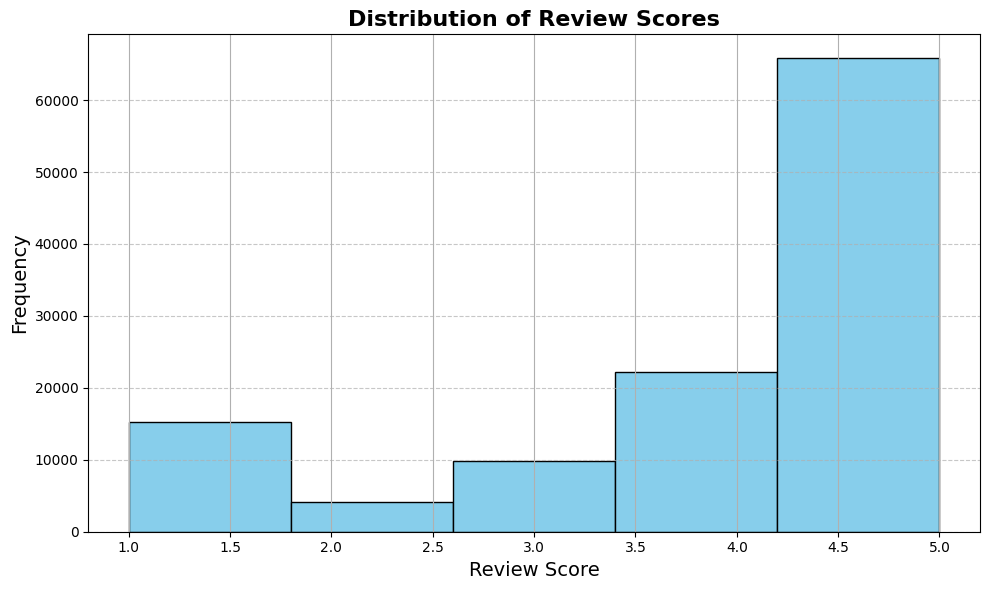

In [19]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of review scores
df['review_score'].hist(bins=5, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


The histogram reveals a clear pattern in the distribution of review scores. The majority of reviews have high scores, with a significant concentration at 5.0, indicating a generally positive customer sentiment. There is a noticeable drop in the frequency of scores below 4.0, with very few reviews around the middle score of 3.0. Lower scores, such as 1.0 and 2.0, have some presence, highlighting a smaller subset of dissatisfied customers. Overall, the distribution suggests that most customers are highly satisfied, with a small proportion expressing dissatisfaction.

#### **World Clouf of Review Comments**

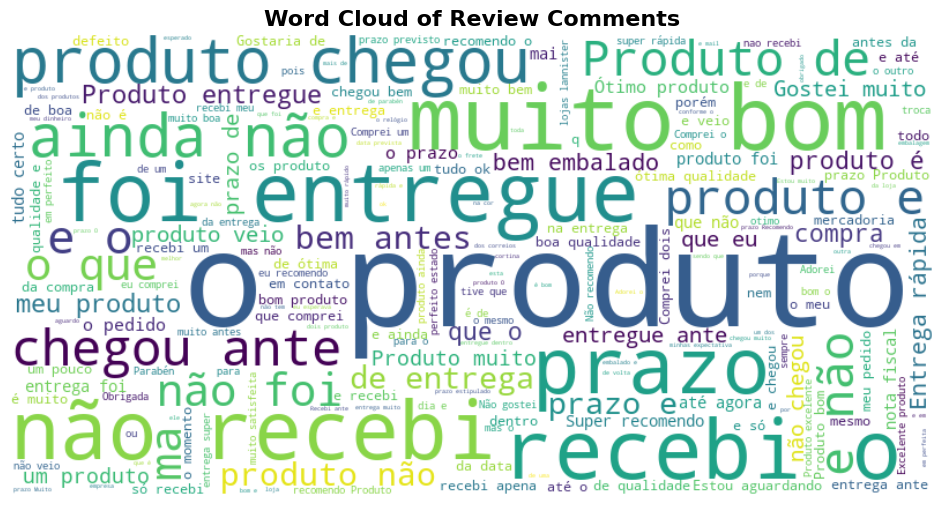

In [22]:
# Combine all review comments into a single string
text = " ".join(comment for comment in df['review_comment_message'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Create the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stopwords, 
    colormap='viridis', 
    max_words=200
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Comments', fontsize=16, fontweight='bold')
plt.show()


The word cloud highlights the most frequently mentioned terms in customer review comments. Words like "produto" (product), "muito" (very), "bom" (good), and "entregue" (delivered) indicate positive customer feedback regarding product quality and delivery. However, terms such as "não" (not), "recebi" (received), and "ainda" (still) suggest dissatisfaction among some customers, possibly due to delivery delays or undelivered items. The prominence of terms related to delivery, such as "prazo" (deadline) and "chegou" (arrived), underscores the importance of timely logistics in customer satisfaction. Overall, the comments reflect a mix of positive and negative sentiments, with delivery performance being a recurring theme.

#### **Review Scores Over Time**

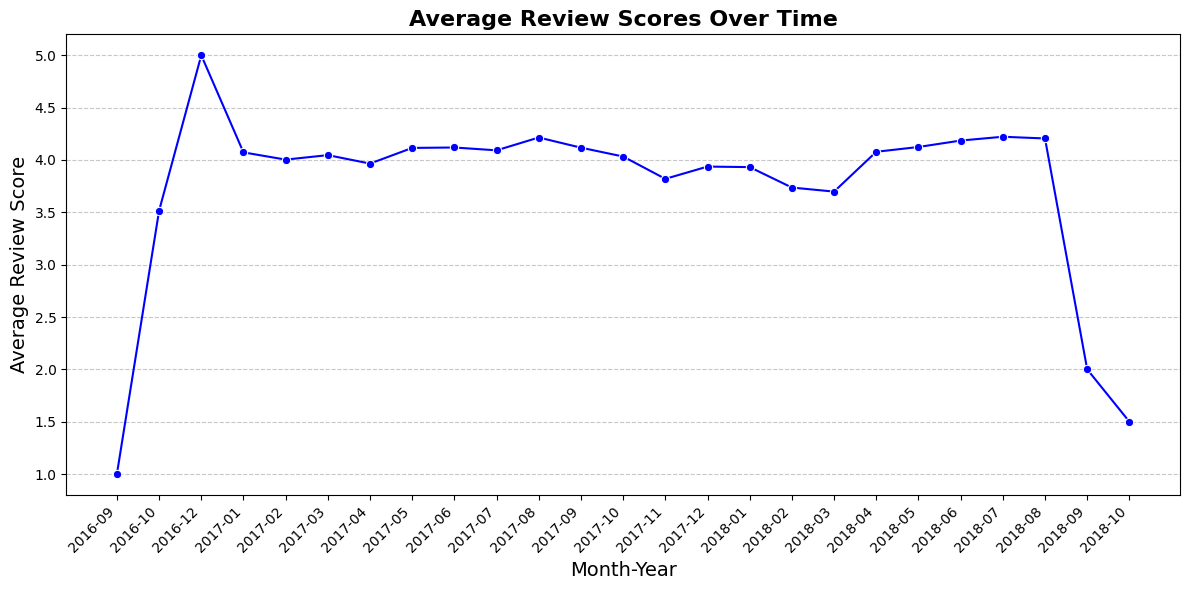

In [23]:
# Ensure the 'order_purchase_timestamp' column is datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

# Extract month and year for grouping
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Calculate average review scores per month
review_scores_time = df.groupby('month_year')['review_score'].mean().reset_index()
review_scores_time['month_year'] = review_scores_time['month_year'].astype(str)  # Convert to string for plotting

# Plot the average review score over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=review_scores_time, x='month_year', y='review_score', marker='o', color='blue')
plt.title('Average Review Scores Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The line plot shows the trend of average review scores over time. Initially, in late 2016, the average scores are highly volatile, with an extreme spike in October 2016 reaching close to 5.0. This could be due to a small number of reviews during the early dataset period, resulting in exaggerated averages. From 2017 onward, the review scores stabilize around 4.0, indicating consistent customer satisfaction. However, there is a noticeable drop in average scores towards the end of 2018, which may reflect emerging issues with product quality, service, or delivery during that period.

#### **Most Common Words in Positive and Negative Reviews**

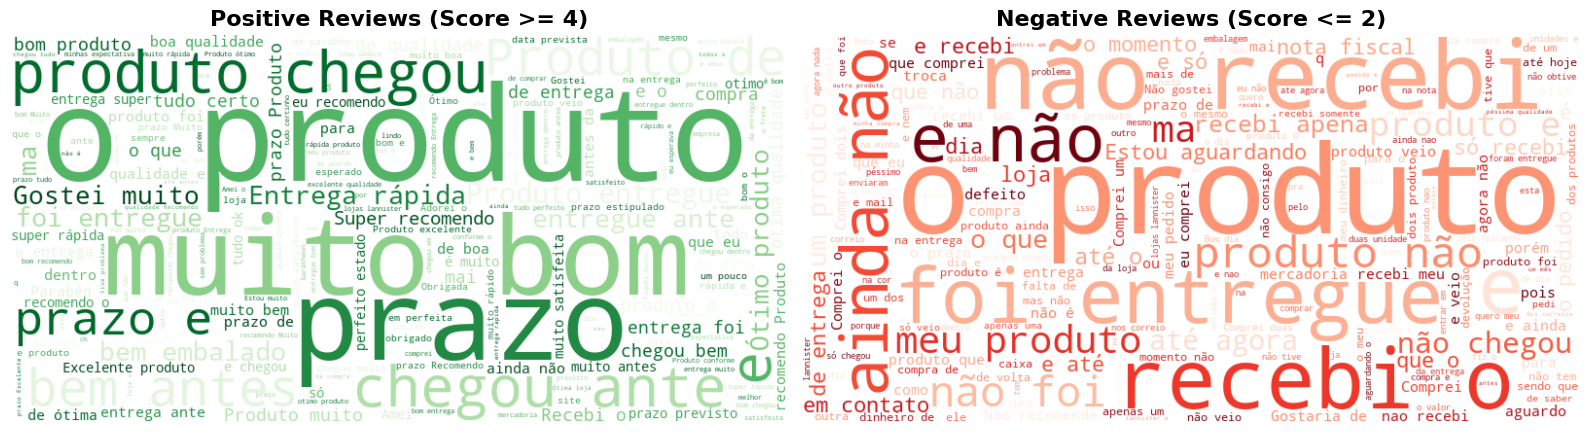

In [24]:
# Positive reviews
positive_reviews = " ".join(comment for comment in df[df['review_score'] >= 4]['review_comment_message'].dropna())

# Negative reviews
negative_reviews = " ".join(comment for comment in df[df['review_score'] <= 2]['review_comment_message'].dropna())

# Word cloud for positive reviews
wordcloud_positive = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=STOPWORDS, 
    colormap='Greens'
).generate(positive_reviews)

# Word cloud for negative reviews
wordcloud_negative = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=STOPWORDS, 
    colormap='Reds'
).generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(16, 8))

# Positive reviews
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews (Score >= 4)', fontsize=16, fontweight='bold')
plt.axis('off')

# Negative reviews
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews (Score <= 2)', fontsize=16, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()



The word clouds provide a comparison between positive and negative reviews. In positive reviews (score >= 4), words like "produto" (product), "muito bom" (very good), "chegou antes" (arrived early), and "prazo" (deadline) dominate, reflecting customer satisfaction with the product quality and timely delivery. Phrases such as "entrega rápida" (fast delivery) highlight positive experiences with logistics.

On the other hand, in negative reviews (score <= 2), terms such as "não recebi" (did not receive), "produto não chegou" (product did not arrive), and "defeito" (defect) are prominent, emphasizing issues with delivery and product quality. Words like "atraso" (delay) and "contato" (contact) suggest frustrations with customer service and logistics.

#### **Review Scores vs. Delivery Time**

C:\Users\Fernando Correia\AppData\Local\Temp\ipykernel_22600\22763944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='review_score', y='delivery_time', palette='viridis')


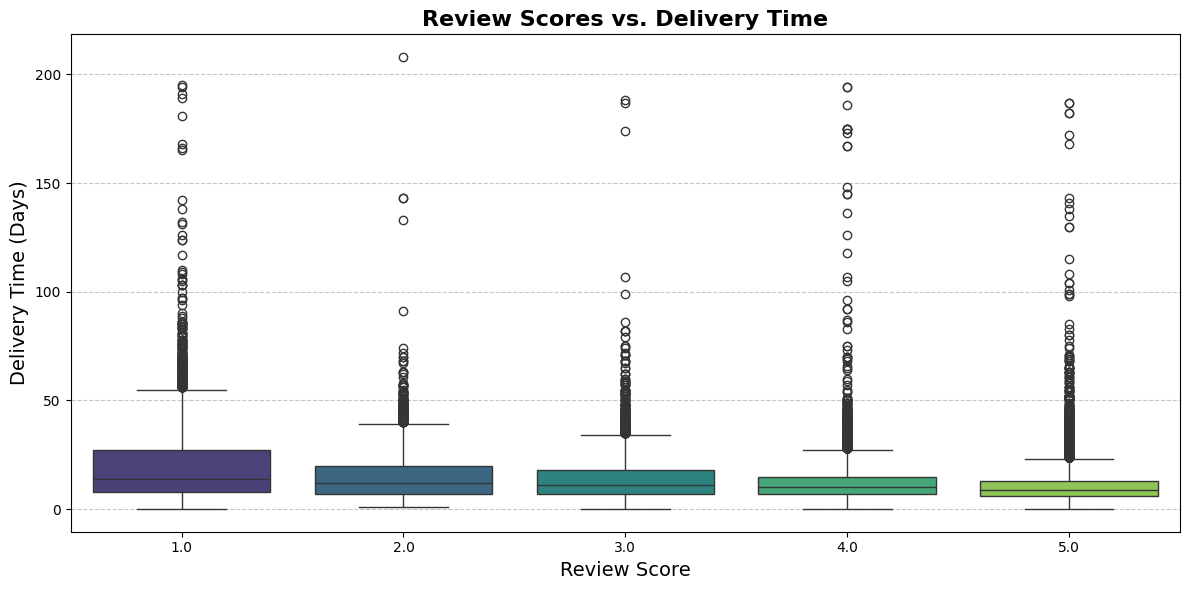

In [25]:
# Ensure 'delivery_time' is calculated
df['delivery_time'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days

# Plot review scores vs. delivery time
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='review_score', y='delivery_time', palette='viridis')
plt.title('Review Scores vs. Delivery Time', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Delivery Time (Days)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The box plot displays the relationship between review scores and delivery times. For all review scores, the median delivery time remains relatively consistent, suggesting that most deliveries are completed within a similar timeframe. However, the spread of delivery times for lower scores (e.g., 1.0 and 2.0) shows a larger number of outliers with significantly longer delivery times, indicating that delayed deliveries might be a major factor contributing to customer dissatisfaction. Conversely, higher scores (e.g., 4.0 and 5.0) show fewer extreme delays, suggesting timely deliveries are linked to better customer experiences. This emphasizes the critical role of punctuality in achieving higher review scores.